<font color="#CA3532"><h1 align="left">Inteligencia Artificial Aplicada a la Bolsa (MIAX-9)</h1></font>
<font color="#5b5a59"><h2 align="left">Práctica sobre Redes Neuronales</h2></font>

En esta práctica desarrollarás, con TensorFlow, Keras y PyTorch, varios modelos de redes neuronales de diferente complejidad. 

Todas las respuestas a los ejercicios de la práctica se deben incluir en este mismo notebook, bien completando el código en los lugares indicados, bien respondiendo a las preguntas planteadas. 

*Versión 1, actualizada el 15-12-2022*



### <font color="#CA3532">Instrucciones</font>

- La práctica se realizará de manera individual.

- Sólo debes entregar este notebook con las soluciones a los ejercicios planteados.

- La entrega se realizará a través de la plataforma de Instituto BME antes de que acabe el plazo establecido.

- Si tienes dudas contacta con luis.lago@uam.es o christian.oliva@uam.es

- No olvides incluir tu nombre y apellidos en el siguiente bloque de código.


In [2]:
# TO-DO: Incluye tu nombre y apellidos aqui:
student_data = {'nombre': 'Fernando', 'apellidos': 'Gallego'}

### <font color="#CA3532">Acceso al material de la práctica</font>

La forma más sencilla de acceder a todo el material de la práctica es clonar este repositorio de ``github``:

In [3]:
!git clone https://github.com/slyder095/MIAX9

fatal: destination path 'MIAX9' already exists and is not an empty directory.


### <font color="#CA3532">Carga de librerías</font>

La siguiente celda carga todas las librerías necesarias para la práctica. Si necesitas alguna librería adicional inclúyela al final.

In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('MIAX9')
import dlfbt

# Incluye aquí otros imports que necesites
from time import time
import shutil
!pip install -q -U keras-tuner
import keras_tuner as kt
import seaborn as sns
import pickle

### <font color="#CA3532">Parte I: Modelos sencillos con Keras</font>

Los primeros modelos los haremos con datos generados de manera artificial.

#### <font color="#CA3532">Ejercicio 1</font> [1 punto]

La siguiente celda crea un problema de clasificación para resolver el problema de la operación booleana XOR (OR exclusivo) en dos dimensiones y representa gráficamente ``x1`` frente a ``x2``:

Forma de x: (1000, 2)
Forma de t: (1000, 1)


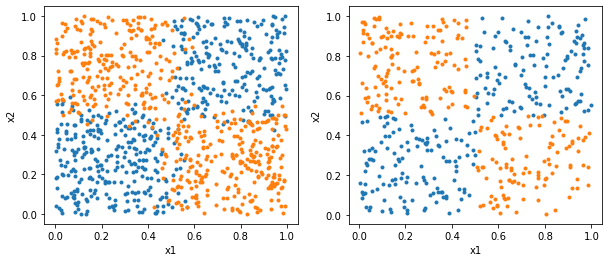

In [4]:
generator = dlfbt.DataGeneratorXOR()

data_train, target_train = generator.create_dataset(n=1000, noise=0.05, seed=23)
data_test, target_test = generator.create_dataset(n=500, seed=42)

print("Forma de x:", data_train.shape)
print("Forma de t:", target_train.shape)
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(data_train[target_train[:, 0]==0, 0], data_train[target_train[:, 0]==0, 1], '.')
plt.plot(data_train[target_train[:, 0]==1, 0], data_train[target_train[:, 0]==1, 1], '.')
plt.xlabel("x1")
plt.ylabel("x2")
plt.subplot(1,2,2)
plt.plot(data_test[target_test[:, 0]==0, 0], data_test[target_test[:, 0]==0, 1], '.')
plt.plot(data_test[target_test[:, 0]==1, 0], data_test[target_test[:, 0]==1, 1], '.')
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

<font color="#CA3532">[1.1]</font> [0.7 puntos]
Construye en Keras un modelo para predecir la clase ``t`` a partir de la variable ``x`` para resolver la operación booleana XOR. 

Requisitos para puntuar el ejercicio:

1. El modelo no debe tener más de 50 parámetros.
2. El modelo debe obtener más de 0.9 validation accuracy.

Define del modelo completando el código de la celda siguiente:

In [5]:
# METODO 1
# NUEVA CELDA CREADA POR FERNANDO GALLEGO
# BASADO EN 
# http://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.3&regularizationRate=0.3&noise=15&networkShape=2&seed=0.71205&showTestData=false&discretize=false&percTrainData=50&x=false&y=false&xTimesY=true&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
# Hago la funcion de X*Y como transformada para ayudar al algoritmo que es equivalente 
# a la primera neurona de el referido http://playground.tensorflow.org/

# Primero hay que centrarlo al cero del data_test y data_test
media = data_test.mean(axis = 0, keepdims= True)
# media = data_test.mean()
std = data_test.std(axis = 0, keepdims= True)
# std = data_test.std()
data_train = (data_train - media)/std
data_test = (data_test - media)/std
# print(media, std, data_train.shape, data_test.shape, data_train.shape)
# print(target_train.shape, target_test.shape)
# print(data_train, data_test)

# Segundo hago la multipicacion de X*Y
data_train_df = pd.DataFrame(data_train,columns =['Xs','Ys'])
data_train_df['Xs*Ys'] = data_train_df.Xs * data_train_df.Ys

data_test_df = pd.DataFrame(data_test,columns =['Xs','Ys'])
data_test_df['Xs*Ys'] = data_test_df.Xs * data_test_df.Ys

data_train = data_train_df['Xs*Ys']
data_test = data_test_df['Xs*Ys']

# data_train, data_test

In [6]:
model = keras.Sequential()

#-------------------------------------------------------------
# TO-DO: Incluye aquí las capas necesarias
model.add(keras.layers.Input(shape=(1), name="entrada"))
model.add(keras.layers.Dense(2, activation="relu", name="oculta1"))
model.add(keras.layers.Dense(1, activation="sigmoid", name="salida"))
#-------------------------------------------------------------
# Segun lo explicado en clase; en problemas CNN, se ha de usar relu o variantes. 
# Y Sigmoide no se usa nunca excepto para la capa de salida si es claramente binaria; 
# como es este caso que es un problema de clasificación binaria.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oculta1 (Dense)             (None, 2)                 4         
                                                                 
 salida (Dense)              (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


Compila el modelo, utilizando un optimizador Adam y la función de coste más apropiada para este problema. Tenéis libertad tanto para transformar el target como para utilizar cualquier función de coste (https://keras.io/api/losses/). El learning rate lo deberás ajustar para que el entrenamiento converja:

In [7]:
#-------------------------------------------------------------
# TO-DO: Compila el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), # antes 0.3
              loss='binary_crossentropy',
              metrics=['acc'])
# Entiendo que este es un problema CLASIFICADOR DOS CAPAS. Segun lo explicado en clase por Luis
# la funcion de coste a de ser binary_crossentropy con salida de red sigmoide. Es
# He puesto el learning rate con el que tengo en http://playground.tensorflow.org (0.3) al principio
# sale mejor con lr de 0.01
#-------------------------------------------------------------

La siguiente celda ajusta tu modelo a los datos y muestra gráficamente el resultado:

Epoch 1/200
32/32 [==============================] - 2s 18ms/step - loss: 0.8540 - acc: 0.2070 - val_loss: 0.7389 - val_acc: 0.4520
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6618 - acc: 0.6670 - val_loss: 0.5584 - val_acc: 0.8600
Epoch 3/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5197 - acc: 0.8230 - val_loss: 0.4452 - val_acc: 0.8920
Epoch 4/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4339 - acc: 0.8790 - val_loss: 0.3721 - val_acc: 0.9280
Epoch 5/200
32/32 [==============================] - 0s 5ms/step - loss: 0.3782 - acc: 0.8990 - val_loss: 0.3228 - val_acc: 0.9540
Epoch 6/200
32/32 [==============================] - 0s 5ms/step - loss: 0.3404 - acc: 0.9050 - val_loss: 0.2848 - val_acc: 0.9560
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 0.3123 - acc: 0.9060 - val_loss: 0.2557 - val_acc: 0.9620
Epoch 8/200
32/32 [==============================] - 0s 5ms/step - loss: 0.2918 - 

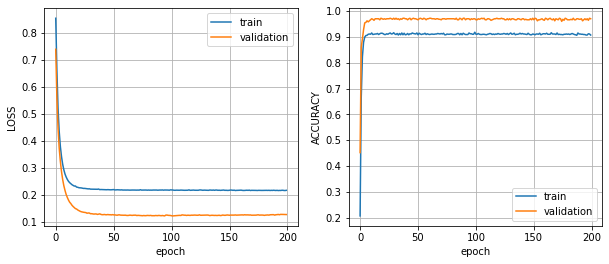

In [8]:
history = model.fit(data_train, target_train[:, None], epochs=200, verbose=1, validation_data=(data_test, target_test))
y = model.predict(data_test, verbose=0)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="validation")
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('LOSS')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label="train")
plt.plot(history.history['val_acc'], label="validation")
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

Esta última celda comprueba los requisitos del ejercicio 1.1:

In [9]:
assert model.count_params() < 50, "[FAIL] El número de parámetros es mayor que 50"
assert model.evaluate(data_test, target_test, verbose=0)[-1] > 0.9, "[FAIL] El modelo no obtiene un accuracy en validación mayor a 0.9"
print("[OK] Requisitos cumplidos")

[OK] Requisitos cumplidos


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oculta1 (Dense)             (None, 10)                30        
                                                                 
 salida (Dense)              (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
32/32 [==============================] - 2s 16ms/step - loss: 0.7025 - acc: 0.4810 - val_loss: 0.6923 - val_acc: 0.5600
Epoch 2/200
32/32 [==============================] - 0s 7ms/step - loss: 0.6941 - acc: 0.5150 - val_loss: 0.6990 - val_acc: 0.4980
Epoch 3/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6909 - acc: 0.5730 - val_loss: 0.6979 - val_acc: 0.5800
Epoch 4/200
32/32 [==============================] - 0s 5ms/

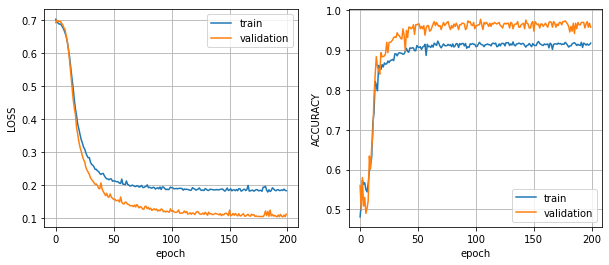

[OK] Requisitos cumplidos


In [10]:
# # METODO 2. SIN HACER LAS TRANSFORMACIONES DE VALORES X*Y
# Es un problema  clasificador dos capas. Por lo que segun los apuntes deberia ser
# una funcion de coste de CROSS-ENTROPY bynaria y salida de red  SIGMOIDE

# SE VE QUE NO APRENDE; NO SE LE ACERCA; si uso RELU en la capa oculta. 
# Por lo tanto entiendo que este problema se resuelve
# segun el METODO 1 que es haciendo la transformacion en la neurona de entrada de X*Y
# Ademas he visto en http://playground.tensorflow.org/ que con redes de 1 o dos capas de hasta 5 neuronas
# cada capa; no se alcanza un acc de cerca del 90%.

# Pero he probado con función de activación tanh y si llega a pasar los requerimientos del problema; 
# como se puede ver más abajo. La función de activación tanh es principalmente usada para problemas 
# con RNN. Pero no limitada a este caso. Y en este caso tanh funciona mejor.
generator = dlfbt.DataGeneratorXOR()

data_train, target_train = generator.create_dataset(n=1000, noise=0.05, seed=23)
data_test, target_test = generator.create_dataset(n=500, seed=42)
model = keras.Sequential()

#-------------------------------------------------------------
# TO-DO: Incluye aquí las capas necesarias
model.add(keras.layers.Input(shape=(2), name="entrada"))
model.add(keras.layers.Dense(10, activation="tanh", name="oculta1")) # SOLO ME SALE CON ESTA COMBINACION
# model.add(keras.layers.Dense(2, activation="relu", name="oculta2"))
model.add(keras.layers.Dense(1, activation="sigmoid", name="salida"))
#-------------------------------------------------------------

model.summary()

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), #0.3
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(data_train, target_train[:, None], epochs=200, verbose=1, validation_data=(data_test, target_test))
y = model.predict(data_test, verbose=0)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="validation")
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('LOSS')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label="train")
plt.plot(history.history['val_acc'], label="validation")
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

assert model.count_params() < 50, "[FAIL] El número de parámetros es mayor que 50"
assert model.evaluate(data_test, target_test, verbose=0)[-1] > 0.9, "[FAIL] El modelo no obtiene un accuracy en validación mayor a 0.9"
print("[OK] Requisitos cumplidos")

<font color="#CA3532">[1.2]</font> [0.3 puntos]
Justifica brevemente, analizando el problema, por qué las curvas de loss y accuracy en entrenamiento dan peor resultado que en validación.

In [11]:
# Dan peores valores pq:
# - son menos valores
# - data_train se ha generado con un noise=0.05
# - al ser otra semilla, da valores diferentes
# - en el ejemplo 1;al usar la media y std de la parte de data_train para centrar en 0 el data_test; 
# esto puede producir alguna desviacion.

# En clase se dijo; cuando se produce una diferencia muy grande entre training y validación 
# lo que está pasan es que el modelo se está aprendiendo "de memoria" los datos de entrenamiento 
# en vez de generalizar a los de validación. Pero creo que este no es el caso porque para el primer caso 
# (X*Y) el número de parámetros es solo 7. Que comparado con 1000 ejemplos; son muy pocos párametros
# para que la red memorice todos los ejemplos. Y lo mismo para el caso 2 (usando tanh); que 41
# parámetros es muy pocos para que la red memorice alrededor de 1000 ejemplos de entrenamiento.

#### <font color="#CA3532">Ejercicio 2</font> [1 punto] 

A continuación vas a resolver un problema de regresión no lineal. La siguiente celda crea el problema y representa gráficamente ``t`` frente a ``x``:

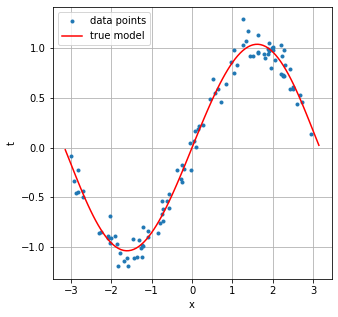

Forma de x: (100, 1)
Forma de t: (100, 1)


In [12]:
dg = dlfbt.DataGeneratorNonLinear1D(coefs=[0, 1, 0, -0.15, 0, 0.005])
dg.create_dataset(xmin=-3.14, xmax=3.14, noise=0.1, seed=21)
data_train = dg.x
target_train = dg.t
dg.plot_dataset()

print("Forma de x:", data_train.shape)
print("Forma de t:", target_train.shape)

<font color="#CA3532">[2.1]</font> [1.0 punto]
Construye en Keras un modelo para predecir la variable ``t`` a partir de la variable ``x``.

Requisitos para puntuar el ejercicio:

1. El modelo no debe tener más de 100 parámetros.
2. El modelo debe obtener un valor de la métrica del logaritmo del coseno hiperbólico ``logcosh`` por debajo de 0.005 (puedes consultar https://keras.io/api/metrics/regression_metrics/ para buscar más información sobre la métrica).

Define del modelo de regresión completando el código de la celda siguiente:

In [13]:
# Entiendo que este problema es un problema de regresión. Según lo explicado en 
# clase, en problemas de regresión, la función de coste más apropiada
# sería un MSE con una salida son función de activación

# Según lo estudiado con Cristian:
# relu y variantes son las que mejor resultado dan en validación en general.
# Redes normales (feedforward) -- relu o variantes
# Redes CNN -- relu o variantes
# Redes RNN -- tanh
# Sigmoid no se utiliza nunca excepto para la capa de salida si es clasificación binaria

# He visto también:
# https://keras.io/api/losses/regression_losses/#log_cosh-function
# logcosh
# https://keras.io/api/metrics/regression_metrics/

In [14]:
model = keras.Sequential()

#-------------------------------------------------------------
# TO-DO: Incluye aquí las capas necesarias
model.add(keras.layers.Input(shape=(1), name="entrada"))
model.add(keras.layers.Dense(32, activation="tanh", name="oculta1"))
model.add(keras.layers.Dense(1, activation=None, name="salida"))
#-------------------------------------------------------------

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oculta1 (Dense)             (None, 32)                64        
                                                                 
 salida (Dense)              (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


Compila el modelo, utilizando un optimizador SGD y la función de coste más apropiada para este problema. Tenéis libertad para utilizar cualquier función de coste (https://keras.io/api/losses/). El learning rate lo deberás ajustar para que el entrenamiento converja:

In [15]:
# Asegúrate de que la primera métrica que solicitas sea el requisito del enunciado
#-------------------------------------------------------------
# TO-DO: Compila el modelo
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.LogCoshError()]             
             )
model.summary()
#-------------------------------------------------------------

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oculta1 (Dense)             (None, 32)                64        
                                                                 
 salida (Dense)              (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


La siguiente celda ajusta tu modelo a los datos y muestra gráficamente el resultado:

 > Error LogCosh antes de entrenar: 0.18038035929203033
 > Error LogCosh después de entrenar: 0.0035115843638777733


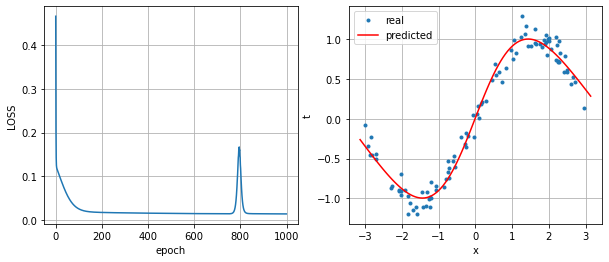

In [16]:
print(" > Error LogCosh antes de entrenar:", model.evaluate(dg.modelx, dg.modely, verbose=0)[1])
history = model.fit(data_train, target_train, epochs=1000, batch_size=dg.x.shape[0], verbose=0)
print(" > Error LogCosh después de entrenar:", model.evaluate(dg.modelx, dg.modely, verbose=0)[1])
y = model.predict(dg.modelx, verbose=0)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('LOSS')

plt.subplot(1, 2, 2)
plt.plot(dg.x, dg.t, '.')
plt.plot(dg.modelx, y, 'r-')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('t')
plt.legend(('real', 'predicted'))
plt.show()

Esta última celda comprueba los requisitos del ejercicio 2:

In [17]:
assert model.count_params() < 100, "[FAIL] El número de parámetros es mayor que 100"
assert model.evaluate(dg.modelx, dg.modely, verbose=0)[1] < 0.005, "[FAIL] El modelo no obtiene un Error LogCosh en validación menor que 0.005"
print("[OK] Requisitos cumplidos")

[OK] Requisitos cumplidos


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oculta1 (Dense)             (None, 32)                64        
                                                                 
 salida (Dense)              (None, 1)                 33        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
 > Error LogCosh antes de entrenar: 0.3351536691188812
 > Error LogCosh después de entrenar: 0.0026460697408765554


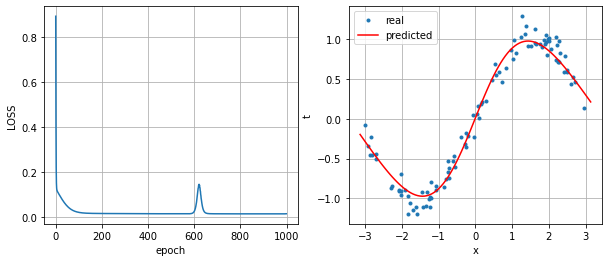

[OK] Requisitos cumplidos


In [18]:
# Resumen en esta celda de lo que he ido testeando para este ejercicio 2
dg = dlfbt.DataGeneratorNonLinear1D(coefs=[0, 1, 0, -0.15, 0, 0.005])
dg.create_dataset(xmin=-3.14, xmax=3.14, noise=0.1, seed=21)
data_train = dg.x
target_train = dg.t

l2reg = 0.02
l1reg = 0.001#0.001
# Como he puesto el máximo número de neuronas posibles para entrenar para tener 
# número de paramentaros menos a 100 aplico lo explicado por Christian en:
# En el caso en que queramos "apagar" neuronas usamos L1
# L1 puede identificar los atributos de entrada redundantes, por ejemplo, para anularlos
# En el caso en que queramos "simplificar" el modelo usamos L2
# Cuando se produce una diferencia muy grande entre training y validación lo que está pasan
# es que el modelo se está aprendiendo "de memoria" los datos de entrenamiento en vez de
# generalizar a los de validación.
# No obstante, me cumple las condiciones del problema; como aparece abajo.

model = keras.Sequential()
model.add(keras.layers.Input(shape=(1), name="entrada"))
model.add(keras.layers.Dense(32, activation="tanh", name="oculta1",
                             #kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1reg, l2=l2reg)  
                             # kernel_initializer=keras.initializers.glorot_normal()
                            ))
#model.add(keras.layers.Dense(8, activation="tanh", name="oculta2",
                             #kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1reg, l2=l2reg)
                             # kernel_initializer=keras.initializers.glorot_normal()
#                            ))
model.add(keras.layers.Dense(1, activation=None, name="salida"))

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),
              # loss='logcosh',
              loss='mean_squared_error',
              #metrics=['acc']
              metrics=[tf.keras.metrics.LogCoshError()]             
             )
model.summary()

print(" > Error LogCosh antes de entrenar:", model.evaluate(dg.modelx, dg.modely, verbose=0)[1])
history = model.fit(data_train, target_train, epochs=1000, batch_size=dg.x.shape[0], verbose=0)
#si le meto mas epocas
# history = model.fit(data_train, target_train, epochs=5000, batch_size=dg.x.shape[0], verbose=0)
print(" > Error LogCosh después de entrenar:", model.evaluate(dg.modelx, dg.modely, verbose=0)[1])
y = model.predict(dg.modelx, verbose=0)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('LOSS')

plt.subplot(1, 2, 2)
plt.plot(dg.x, dg.t, '.')
plt.plot(dg.modelx, y, 'r-')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('t')
plt.legend(('real', 'predicted'))
plt.show()

assert model.count_params() < 100, "[FAIL] El número de parámetros es mayor que 100"
assert model.evaluate(dg.modelx, dg.modely, verbose=0)[1] < 0.005, "[FAIL] El modelo no obtiene un Error LogCosh en validación menor que 0.005"
print("[OK] Requisitos cumplidos")

#### <font color="#CA3532">Ejercicio 3</font> [1 punto]

En este ejercicio vas a construir una red neuronal un poco más compleja y la vas a probar con distintos casos de prueba. La red debe tener las siguientes características:

- Una capa de entrada con 54 unidades.
- Dos capas ocultas, con 200 y 50 unidades respectivamente, función de activación ``sigmoid`` y ``batch normalization``.
- Una capa de salida lineal con 7 unidades. 
- Se debe aplicar ``dropout`` con parámetro 0.1 en las dos capas ocultas.
- Se debe incluir regularización L2, con parámetro 0.02, y L1, con parámetro 0.001, en los pesos de todas las capas (no debe afectar a los bias). 
- Todos los pesos de la red se deben inicializar con el método Xavier (ver transparencias [dffn.pdf](https://drive.google.com/file/d/1zzk1c40A_EP0TDf960i1E-_qf-7ECEUu/view?usp=sharing), p. 86).

<font color="#CA3532">[3.1]</font> [0.5 puntos] Completa el código de la siguiente celda con tu solución:

In [19]:
# Opcion 1 pero no me sale en el ejercicio 4 con esta opcion que esntiendo cumple con el enunciado
# Me da error:
# NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for 
# fichero_pesos
model = keras.Sequential()

#-------------------------------------------------------------
# TO-DO: Incluye aquí las capas necesarias
l2reg = 0.02
l1reg = 0.001
activation = 'sigmoid'
model.add(keras.layers.Input(shape=(54)))
model.add(keras.layers.Dense(200, activation=activation, name="oculta1",
                             kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1reg, l2=l2reg),
                             kernel_initializer=keras.initializers.glorot_normal()))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation(activation))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(50, activation=activation, name="oculta2",
                             kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1reg, l2=l2reg),
                             kernel_initializer=keras.initializers.glorot_normal()))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation(activation))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(7, activation=None, name="salida",
                             kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1reg, l2=l2reg),
                             kernel_initializer=keras.initializers.glorot_normal()))
#-------------------------------------------------------------

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oculta1 (Dense)             (None, 200)               11000     
                                                                 
 batch_normalization (BatchN  (None, 200)              800       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 200)               0         
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 oculta2 (Dense)             (None, 50)                10050     
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                      

In [20]:
# Opcion 2 Me sale con esta opcion
# No Me da error:
# NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for 
# fichero_pesos

model = keras.Sequential()

#-------------------------------------------------------------
# TO-DO: Incluye aquí las capas necesarias
l2reg = 0.02
l1reg = 0.001
activation = 'sigmoid'
model.add(keras.layers.Input(shape=(54)))
model.add(keras.layers.Dense(200, activation=None, name="oculta1",
                             kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1reg, l2=l2reg),
                             kernel_initializer=keras.initializers.glorot_normal()))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation(activation))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(50, activation=None, name="oculta2",
                             kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1reg, l2=l2reg),
                             kernel_initializer=keras.initializers.glorot_normal()))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation(activation))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(7, activation=None, name="salida",
                             kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1reg, l2=l2reg),
                             kernel_initializer=keras.initializers.glorot_normal()))
#-------------------------------------------------------------

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oculta1 (Dense)             (None, 200)               11000     
                                                                 
 batch_normalization_2 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 200)               0         
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 oculta2 (Dense)             (None, 50)                10050     
                                                                 
 batch_normalization_3 (Batc  (None, 50)               200       
 hNormalization)                                      

<font color="#CA3532">[3.2]</font> [0.5 puntos] Si has hecho todo bien, tu modelo debería tener 21907 parámetros entrenables. Explica de dónde sale este número:

In [21]:
# Trainable params: 21,907 es la suma de 
# 1) oculta1 (Dense)             (None, 200)               11000
# número de neuronas en capa anterior 54 * número de neuronas en esta capa densa 200 de parámetros Ws = 10800 parametros
# número de bias en esta capa es igual a número de neuronas en esta capa que es 200
# 11000 = 10800 + 200

# 2) oculta2 (Dense)             (None, 50)                10050
# número de neuronas en capa anterior 200 * número de neuronas en esta capa densa 50 da parámetros Ws = 10000 parametros
# número de bias en esta capa es igual a número de neuronas en esta capa que es 50
# 10050 = 10000 + 50

# 3) salida (Dense)              (None, 7)                 357 
# número de neuronas en capa anterior 50 * número de neuronas en esta capa 5 da parámetros Ws = 350 parámetros
# número de bias en esta capa es igual a número de neuronas en esta capa que es 7
# 357 = 350 + 7

# 4) 11000 + 10050 + 357 = 21407

# 5) como el son 200 neuronas en capa oculta1 y 50 en neuronas en capa oculta2; 
# Eso hace una relación de conexiones entre neuronas de 200 * 50 =1000.  Entonces 
# nos sale Total parametros: 22,407. Pero como tenemos Non-trainable params: 500; 
# entonces nos sale Trainable params: 21,907.

# 6) Los Non-trainable params: 500 
# Este caso específico de BatchNormalization tiene 1000 parámetros en total, 
# (batch_normalization_(el que saleX) (BatchNormalization)  (None, 200)              800 
# batch_normalization_(el que saleY) (BatchNormalization)  (None, 50)               200       
# 1000 = 800 + 20)
# 500 entrenables y 500 no entrenables. 
# Los 500 parámetros (la mitad de los 1000) no entrenables corresponden a la media y la desviación estándar 
# calculadas de las activaciones que se usan durante el tiempo de prueba, y estos parámetros nunca serán 
# entrenables usando el descenso por gradiente y no se ven afectados por la data entrenable.

#### <font color="#CA3532">Ejercicio 4</font> [1 punto]

A continuación vamos a hacer una serie de pruebas para verificar que tu modelo está bien construido. Para ello vamos a usar los datos del problema de clasificación Forest Covertypes. El problema consiste en predecir el tipo de cubierta vegetal de un terreno a partir de características del mismo como su elevación, su pendiente, etcétera. Los detalles del problema los puedes consultar en estos enlaces:

https://scikit-learn.org/stable/datasets/real_world.html#forest-covertypes

https://archive.ics.uci.edu/ml/datasets/Covertype

La siguiente celda carga y prepara los datos:


In [22]:
from sklearn.datasets import fetch_covtype
data = fetch_covtype()
x = data.data
t = data.target - 1

A continuación imprimimos la forma de las variables ``x`` e ``y``, así como los valores numéricos de cada una de las 7 clases del problema:

In [23]:
print(x.shape)
print(t.shape)
print(np.unique(t))

(581012, 54)
(581012,)
[0 1 2 3 4 5 6]


<font color="#CA3532">[4.1]</font> [0.7 puntos] Prepara correctamente los datos y carga los pesos del modelo para obtener el resultado esperado.

Lo primero que debes hacer es dividir los datos en conjuntos de entrenamiento y test usando la función [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de ``scikit-learn``. El conjunto de test debe tener el 30% de los datos. La semilla (``random_state``) se debe fijar al valor 35 para que los resultados sean reproducibles. Utiliza los nombres de variable ``x_train``, ``x_test``, ``t_train`` y ``t_test``.

In [24]:
#-------------------------------------------------------------
# TO-DO: Incluye aquí el código para crear los conjuntos de entrenamiento y test
from sklearn.model_selection import train_test_split


# Particion entrenamiento-test:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.30, random_state=35)

#-------------------------------------------------------------

A continuación estandariza los datos usando la clase [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [25]:
#-------------------------------------------------------------
# TO-DO: Estandariza los datos
# Estandarizacion:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train)
print(t_test)
#-------------------------------------------------------------

[[ 1.54430297  1.67327649  0.25233766 ...  6.04970781 -0.15625202
  -0.12341768]
 [ 0.99848353 -1.14003793  0.25233766 ... -0.16529724 -0.15625202
  -0.12341768]
 [ 0.05310999 -0.02364332 -1.61666031 ... -0.16529724 -0.15625202
  -0.12341768]
 ...
 [-0.86729142 -0.67561777 -1.3496606  ... -0.16529724 -0.15625202
  -0.12341768]
 [ 1.59424723  0.31574064 -0.54866147 ...  6.04970781 -0.15625202
  -0.12341768]
 [-0.38925348 -0.73813587  1.98783578 ... -0.16529724 -0.15625202
  -0.12341768]]
[0 0 0 ... 1 1 1]


In [26]:
# Cambia el formato de las variables ``t_train``  y ``t_test`` si es necesario
from tensorflow.keras.utils import to_categorical
t_train = to_categorical(t_train)
print(t_train)

t_test = to_categorical(t_test)
print(t_test)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


En la celda siguiente, compila el modelo usando como optimizador ``Adam`` con un learning rate de ``0.01`` y como función de coste ``hinge-loss``. Añade la precisión (``accuracy``) como métrica. Cambia el formato de las variables ``t_train``  y ``t_test`` si es necesario. A continuación carga los pesos del fichero ``random-weights``.

In [27]:
# fichero_pesos = "MIAX9/models/random-weights"

#-------------------------------------------------------------
# TO-DO: Incluye aquí el código para compilar el modelo y cargar los pesos
# Es necesario cambiar el formato de las clases a one-hot, porque hinge solo
# tiene version categorical...
# Hecho en la celda anterior el cambio to_categorical
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss= 'categorical_hinge',
              metrics=['acc'])


#Para cargar los pesos posteriormente, usamos el método load_weights. Para poder cargar los pesos en
#un modelo, el modelo debe estar creado de la misma manera que los pesos guardados


############# SI ACTIVO LA SIGUIENTE LINEA YA ME DA ERROR ###############################
# model.load_weights('fichero_pesos')
model.load_weights("MIAX9/models/random-weights")
#############################################################################################
#############################################################################################




#-------------------------------------------------------------

En la celda siguiente se evalúa el modelo sobre el conjunto de datos. Como tu modelo parte de unos pesos determinados, los resultados deberían ser reproducibles. 

Si has hecho todo bien deberías obtener este resultado (no es demasiado bueno, pero ten en cuenta que el modelo aún no ha sido entrenado):

````
5447/5447 [==============================] - 10s 2ms/step - loss: 6.4629 - acc: 0.0668
[6.462921619415283, 0.06680282950401306]
````

In [28]:
h = model.evaluate(x_test, t_test)
print(h)

assert np.abs(h[0] - 6.462921619415283) < 1e-10, "[FAIL] Loss no ajustado correctamente"
assert np.abs(h[1] - 0.06680282950401306) < 1e-10, "[FAIL] Métrica ACC no es correcta"
print("[OK] Se ha definido y se han cargado los pesos del modelo correctamente")

5447/5447 [==============================] - 15s 3ms/step - loss: 6.4629 - acc: 0.0668
[6.462921619415283, 0.06680282950401306]
[OK] Se ha definido y se han cargado los pesos del modelo correctamente


<font color="#CA3532">[4.2]</font> [0.3 puntos] Entrena correctamente el modelo y evalúalo para obtener los valores esperados.

Como última prueba vamos a entrenar el modelo durante 10 épocas. Antes de llamar a ``model.fit`` inicializamos las semillas del generador de números aleatorios para que, de nuevo, el resultado sea reproducible. Numpy debe inicializarse al valor 17 (usa ``np.random.seed()``) y Tensorflow a 195 (usa ``tf.random.set_seed()``). Ajusta el ``batch_size`` durante el entrenamiento a 512 y el parámetro ``shuffle`` a False.

Si has hecho todo bien, al ejecutar la celda siguiente este debería ser el resultado al final de las 10 épocas:

````
loss: 0.7615 - acc: 0.6960
````

In [29]:
#-------------------------------------------------------------
# TO-DO: Incluye aquí el código para entrenar el modelo. Recuerda
# definir las semillas tanto para numpy como para tf
# Entrenamiento del modelo:
n_epochs = 10 
np.random.seed(17)
tf.random.set_seed(195)
batch_size = 512
history = model.fit(x_train, 
                    t_train, 
                    epochs=n_epochs, 
                    validation_data=(x_test, t_test),
                    batch_size=batch_size,
                    shuffle=False
                   )
#-------------------------------------------------------------

Epoch 1/10
795/795 [==============================] - 13s 13ms/step - loss: 0.8809 - acc: 0.6920 - val_loss: 0.7805 - val_acc: 0.6886
Epoch 2/10
795/795 [==============================] - 9s 12ms/step - loss: 0.7570 - acc: 0.6991 - val_loss: 0.7499 - val_acc: 0.7003
Epoch 3/10
795/795 [==============================] - 10s 12ms/step - loss: 0.7481 - acc: 0.6994 - val_loss: 0.7306 - val_acc: 0.7020
Epoch 4/10
795/795 [==============================] - 10s 12ms/step - loss: 0.7440 - acc: 0.6997 - val_loss: 0.7312 - val_acc: 0.7041
Epoch 5/10
795/795 [==============================] - 10s 12ms/step - loss: 0.7403 - acc: 0.6999 - val_loss: 0.7097 - val_acc: 0.7082
Epoch 6/10
795/795 [==============================] - 9s 12ms/step - loss: 0.7305 - acc: 0.6998 - val_loss: 0.7031 - val_acc: 0.7073
Epoch 7/10
795/795 [==============================] - 10s 12ms/step - loss: 0.7279 - acc: 0.7008 - val_loss: 0.7308 - val_acc: 0.7045
Epoch 8/10
795/795 [==============================] - 10s 13ms/s

Y al evaluar el modelo sobre el conjunto de test te debería salir esto:

````
5447/5447 [==============================] - 10s 2ms/step - loss: 0.7401 - acc: 0.7063
[0.7401401400566101, 0.7062546014785767]
````

In [30]:
h = model.evaluate(x_test, t_test)
print(h)

assert np.abs(h[0] - 0.7401401400566101) < 1e-10, "[FAIL] Loss no ajustado correctamente"
assert np.abs(h[1] - 0.7062546014785767) < 1e-10, "[FAIL] Métrica ACC no es correcta"
print("[OK] Se ha entrenado el modelo correctamente")

5447/5447 [==============================] - 14s 3ms/step - loss: 0.7185 - acc: 0.6995
[0.7184925675392151, 0.6995134949684143]


AssertionError: [FAIL] Loss no ajustado correctamente

In [31]:
# Entiendo que el fit lo he hecho como se pide y hasta entonces todo iba segun lo requerido. 
# El fit da valores muy parecidos a los que se piden pero no iguales. Por eso esta celda da error.

### <font color="#CA3532">Parte II: Optimización de hiperparámetros</font>


En esta parte de la práctica vamos a seguir trabajando con la base de datos de Forest Covertypes. Los datos deberían estar cargados en las variables ``x_train``, ``x_test``, ``t_train`` y ``t_test``:

In [32]:
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(406708, 54)
(174304, 54)
(406708, 7)
(174304, 7)


#### <font color="#CA3532">Ejercicio 5</font> [1 punto]

Construye una red neuronal para el problema Forest Covertypes, realizando una búsqueda lo más completa posible de los hiperparámetros con [Keras Tuner](https://keras-team.github.io/keras-tuner/documentation/tuners/). Debes considerar, al menos, los siguientes hiperparámetros:

- Learning rate.
- Número de capas ocultas.
- Número de unidades en las capas ocultas.
- Función de activación.
- Algún parámetro de regularización o dropout. 

Completa el código de las celdas siguientes en los lugares indicados, sin cambiar el nombre de la carpeta de logs.

**Nota:** Ten en cuenta que este ejercicio puede requerir mucho tiempo de ejecución. 

In [33]:
!pip install -q -U keras-tuner
import keras_tuner as kt

<font color="#CA3532">[5.1]</font> [0.5 puntos] Define el hipermodelo:

In [34]:
def model_builder(hp):
  #-------------------------------------------------------------
  # TO-DO: Incluye aquí los hiperparámetros a optimizar y sus posibles
  # valores. Como ejemplo se muestra el learning rate
    model = keras.Sequential()
    hp_lr = hp.Choice('lr', values = [1.0, 0.1, 0.01, 0.001, 0.0001]) # Learning rate
    hp_num_capas_ocultas = hp.Int('num_layers', min_value=1, max_value=5) # Número de capas ocultas.
    hp_units = hp.Int('units', min_value = 32, max_value = 128, step = 32) # Número de unidades en las capas ocultas. PERO SERI LAS MISMAS EN CADA CAPA??????
    hp_act = hp.Choice('activation', values = ['sigmoid', 'relu']) # Función de activación.
    # hp_l2reg = hp.Choice('l2reg', values = [1.0, 0.1, 0.01, 0.001, 0.0001]) # Algún parámetro de regularización o dropout.
    # hp_l1reg = hp.Choice('l1reg', values = [1.0, 0.1, 0.01, 0.001, 0.0001]) # Algún parámetro de regularización o dropout.
    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.5) # Algún parámetro de regularización o dropout.
    # EXTRA SE PUEDE DESAROLLAR.
    # hp_opt = hp.Choice('optimizer', values = ['adam', 'sgd'])
  #-------------------------------------------------------------
  
    model = keras.Sequential()
  #-------------------------------------------------------------
  # TO-DO: Completa la definición del modelo añadiendo las capas necesarias
    model.add(keras.layers.Input(shape=(54)))
    for _ in range(hp_num_capas_ocultas):
        model.add(keras.layers.Dense(units = hp_units, activation=None, # name="oculta1",
                                 # kernel_regularizer=tf.keras.regularizers.L1L2(l1=hp_l1reg, l2=hp_l2reg),
                                 # kernel_initializer=keras.initializers.glorot_normal())
                 ))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Activation(activation = hp_act))
        model.add(keras.layers.Dropout(rate = hp_dropout))
    model.add(keras.layers.Dense(7, activation=None, name="salida",
                                 # kernel_regularizer=tf.keras.regularizers.L1L2(l1=hp_l1reg, l2=hp_l2reg),
                                 # kernel_initializer=keras.initializers.glorot_normal())
             ))  
    print(model.summary())
  #-------------------------------------------------------------
  
  #-------------------------------------------------------------
  # TO-DO: Compila el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_lr),
              loss= 'categorical_hinge',
              metrics=['acc'])
    # from tensorflow.keras.utils import to_categorical
    # t_train = to_categorical(t_train)
    # print(t_train)
    # t_test = to_categorical(t_test)
    # print(t_test)
  #-------------------------------------------------------------
  
    return model

Borrado de la carpeta de logs:

In [35]:
!rm -rf logs-proyecto/keras_tuner

"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Creación de un ``tuner`` de tipo ``Hyperband`` que usa el hipermodelo anterior. El objetivo a optimizar es la precisión (accuracy) sobre el conjunto de validación. El máximo número de épocas es 10.

In [36]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_acc', 
                     max_epochs = 10,
                     factor = 3,
                     directory = 'logs-proyecto/keras_tuner',
                     project_name = 'kt')  

INFO:tensorflow:Reloading Oracle from existing project logs-proyecto/keras_tuner\kt\oracle.json
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1760      
                                                                 
 batch_normalization_4 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 32)                0         
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 salida (Dense)              (None, 7)                 231       
                                                                 
Total params: 2,119
Trai

Resumen del espacio de búsqueda. Comprueba que contiene todos los valores a considerar para cada uno de los hiperparámetros.

In [37]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
lr (Choice)
{'default': 1.0, 'conditions': [], 'values': [1.0, 0.1, 0.01, 0.001, 0.0001], 'ordered': True}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': None}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'relu'], 'ordered': False}
l2reg (Choice)
{'default': 1.0, 'conditions': [], 'values': [1.0, 0.1, 0.01, 0.001, 0.0001], 'ordered': True}
l1reg (Choice)
{'default': 1.0, 'conditions': [], 'values': [1.0, 0.1, 0.01, 0.001, 0.0001], 'ordered': True}
dropout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': None, 'sampling': None}


In [38]:
# ENTIENDO QUE ME DA IGUAL QUE LO QUE SE PIDE EN EL ENUNCIADO. 
# l1reg  Y l2reg; LUEGO NO LOS USO PQ EN EL ENUNCIADO PONE 'Algún parámetro de regularización O dropout'.

<font color="#CA3532">[5.2]</font> [0.5 puntos] Realiza la búsqueda de hiperparámetros con una validación simple.

Requisitos para puntuar el ejercicio:

1. Respecto a la búsqueda de hiperparámetros:

  1.1. Realizar la búsqueda con los datos de entrenamiento (descartando validación).

  1.2. Validar la búsqueda con los datos de validación.

2. Respecto al entrenamiento del modelo final:

  2.1. Introducir Early-Stopping en el entrenamiento del modelo final.

  2.2. Entrenar correctamente el modelo final con todos los datos de entrenamiento.

  2.3. Evaluar correctamente el modelo final con los datos de test.

  2.4. Superar un 80\% de accuracy en test.

Divide el conjunto de entrenamiento, de manera aleatoria, en dos subconjuntos. El primero, ``(tr_data, tr_labels)`` contendrá el 70% de los datos y lo usaremos para entrenar los hipermodelos. El segundo, ``(val_data, val_labels)`` contendrá el 30% de los datos y lo usaremos para validar los hipermodelos. Puedes usar [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de ``sklearn.model_selection``.

In [39]:
#-------------------------------------------------------------
# TO-DO: Genera los subconjuntos de datos (tr_data, tr_labels) y 
# (val_data, val_labels)


# TOMANDO COMO REFERNCIA EL EJERCICIO ANTERIOR
# Particion entrenamiento-test:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.30, random_state=35) 
tr_data, val_data, tr_labels, val_labels = train_test_split(x_train, t_train, test_size=0.30, random_state=35)

# Estandarizacion:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
tr_data = scaler.fit_transform(tr_data)
val_data = scaler.transform(val_data)

from tensorflow.keras.utils import to_categorical
t_train = to_categorical(t_train)
print(t_train)
t_test = to_categorical(t_test)
print(t_test)
tr_labels = to_categorical(tr_labels)
print(tr_labels)
val_labels = to_categorical(val_labels)
print(val_labels)

tr_data.shape, val_data.shape, tr_labels.shape, val_labels.shape
#-------------------------------------------------------------

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


((284695, 54), (122013, 54), (284695, 7), (122013, 7))

Realiza la búsqueda de los hiperparámetros llamando a ``tuner.search`` usando los datos ``tr_data``, ``tr_labels`` como conjunto de entrenamiento y los datos ``val_data``, ``val_labels`` como conjunto de validación. Recuerda indicarle el ``batch_size`` a 512: 

In [40]:
#-------------------------------------------------------------
# TO-DO: Realiza la búsqueda de los hiperparámetros
callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)] # antes tenia 2; tarda mas con 5 pero creo que es mas correcto
tuner.search(tr_data, tr_labels,
             epochs=10,
             validation_data=(val_data, val_labels),
             batch_size=512)
# callbacks=callbacks) 
# https://blog.paperspace.com/hyperparameter-optimization-with-keras-tuner/

#-------------------------------------------------------------

INFO:tensorflow:Oracle triggered exit


In [41]:
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

{'lr': 0.01, 'num_layers': 4, 'units': 96, 'activation': 'relu', 'l2reg': 1.0, 'l1reg': 0.0001, 'dropout': 0.015687974912098945, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


Selecciona los mejores hiperparámetros, vuelve a entrenar el modelo con todos los datos de entrenamiento y aplícalo al conjunto de test. Recuerda introducir Early-Stopping y prolongar el número de épocas (por ejemplo, 200) para que sea efectivo.

In [42]:
model = tuner.hypermodel.build(best_hps)

#-------------------------------------------------------------
# TO-DO: Con el modelo seleccionado con los mejores hiperparámetros, entrena 
# el modelo final con todos los datos de train y aplícalo al conjunto de test
callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)] # antes tenia 2
history = model.fit(tr_data, 
                    tr_labels, 
                    epochs=200, 
                    validation_data=(val_data, val_labels),
                    #batch_size=512
                    callbacks=callbacks
                    )
#-------------------------------------------------------------
# ENTIENDO QUE aplícalo al conjunto de test ES LO QUE HAY EN LA SIGUIENTE CELDA YA PUESTO COMO EVALUATE
# Esta parte tarda un rato largo para entrenar. Pero entiendo que un tiempo maximo de entreno no es 
# limitante como condicion de este ejercicio. Ademas le he puesto un EarlyStopping ( que lo podia aplicar
# para que parara antes patience=5) para que parara antes. Pero ya se ve que con 10 epocas valdria
# (pero claro; lo que tengo echo esta sin poder cerrar del todo el ej 4).

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 96)                5280      
                                                                 
 batch_normalization_5 (Batc  (None, 96)               384       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 96)                0         
                                                                 
 dropout_5 (Dropout)         (None, 96)                0         
                                                                 
 dense_2 (Dense)             (None, 96)                9312      
                                                                 
 batch_normalization_6 (Batc  (None, 96)               384       
 hNormalization)                                      

In [43]:
h = model.evaluate(x_test, t_test)
print(h)

assert h[1] > 0.8, "[FAIL] No se ha alcanzado el objetivo: alcanzar un 80% de accuracy en test"
print("[OK] Requisito de accuracy cumplido")

5447/5447 [==============================] - 19s 3ms/step - loss: 0.2762 - acc: 0.8717
[0.2761906683444977, 0.8717241287231445]
[OK] Requisito de accuracy cumplido


### <font color="#CA3532">Parte III: Extracción de atributos relevantes a partir de una red neuronal</font>

En los próximos ejercicios vais a trabajar con algunas modificaciones del Iris dataset. Para mostrar algunos ejemplos ilustrativos se utilizará el dataset estándar que hemos usado a lo largo de las clases prácticas. El dataset contiene 150 filas con 4 atributos y pretende clasificar 3 targets: ``setosa``, ``versicolor`` y ``virginica``.

In [44]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
t = iris.target[:, None]
print(x.shape, t.shape)

(150, 4) (150, 1)


En las próximas celdas se van a mostrar algunas herramientas útiles para analizar los datos de entrada:

**Histograma** de los atributos de entrada:

Con un histograma de cada uno de los atributos podemos analizar la escala de los datos, la distribución de los mismos, si hay outliers, etc.

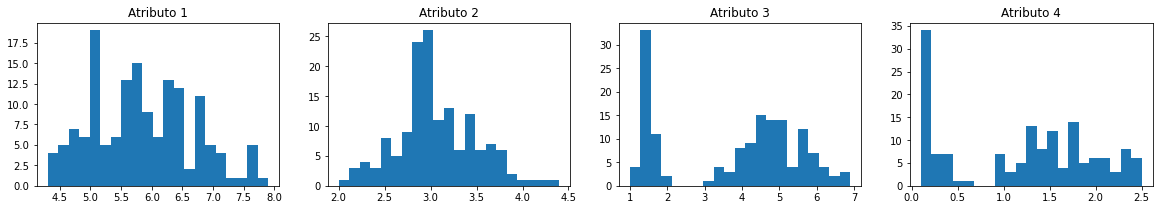

In [45]:
plt.figure(figsize=(20, 3))
for i, x_i in enumerate(x.T):
  plt.subplot(1,x.shape[1],i+1)
  plt.hist(x_i, bins=21)
  plt.title("Atributo "+str(i+1))
plt.show()

**Histograma** de los atributos de entrada por clases:

Con un histograma de cada uno de los atributos, pintando cada clase por separado, podemos analizar la distribución de las clases, si alguna es separable fácilmente de las demás, etc.

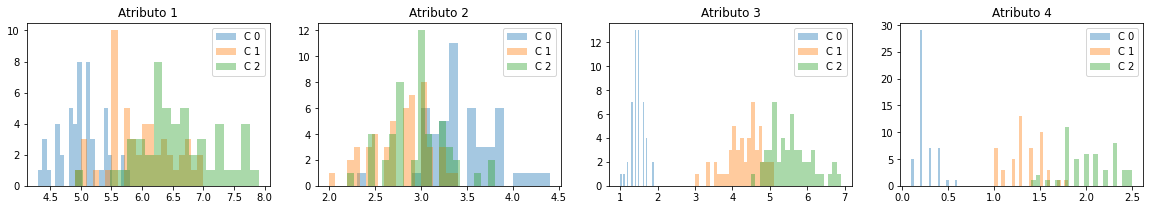

In [46]:
plt.figure(figsize=(20, 3))
for i, x_i in enumerate(x.T):
  plt.subplot(1,x.shape[1],i+1)
  for c in np.unique(t):
    plt.hist(x_i[t[:, 0] == c], bins=21, label="C "+str(c), alpha=0.4)
  plt.title("Atributo "+str(i+1))
  plt.legend()
plt.show()

**Matriz de correlación** de los atributos de entrada:

Con la matriz de correlación podemos analizar la relevancia de los atributos de entrada. Si dos atributos están muy correlados, probablemente serán redundantes.

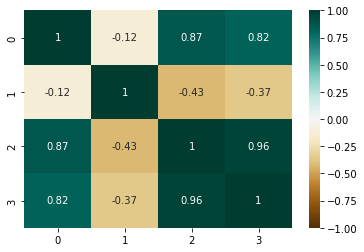

In [47]:
sns.heatmap(np.corrcoef(x.T), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

#### <font color="#CA3532">Ejercicio 6</font> [0.5 puntos]

En este ejercicio vamos a trabajar con una modificación del Iris dataset. Vamos a utilizar la siguiente función que carga directamente los datos:

In [5]:
def load_data_iris():
  x_train = np.load("MIAX9/iris_dataset/data_train.npy")
  x_test = np.load("MIAX9/iris_dataset/data_test.npy")
  t_train = np.load("MIAX9/iris_dataset/target_train.npy")
  t_test = np.load("MIAX9/iris_dataset/target_test.npy")
  return x_train, x_test, t_train, t_test

In [49]:
x_train, x_test, t_train, t_test = load_data_iris()

<font color="#CA3532">[6.1]</font> [0.25 puntos] Realizar un análisis previo de los datos de entrada para comprender las diferencias entre el dataset original (4 atributos) y el nuevo dataset (7 atributos).

In [50]:
# ANALISIS 1. MIRO COMO SON LOS VALORES
x_train, x_test, t_train, t_test

(array([[ 5.7 ,  2.9 ,  4.2 ,  1.3 ,  1.3 , 23.94,  8.41],
        [ 5.6 ,  3.  ,  4.5 ,  1.5 ,  1.5 , 25.2 ,  9.  ],
        [ 7.3 ,  2.9 ,  6.3 ,  1.8 ,  1.8 , 45.99,  8.41],
        [ 4.9 ,  2.5 ,  4.5 ,  1.7 ,  1.7 , 22.05,  6.25],
        [ 5.  ,  3.4 ,  1.5 ,  0.2 ,  0.2 ,  7.5 , 11.56],
        [ 6.1 ,  3.  ,  4.9 ,  1.8 ,  1.8 , 29.89,  9.  ],
        [ 6.5 ,  3.  ,  5.2 ,  2.  ,  2.  , 33.8 ,  9.  ],
        [ 4.4 ,  3.  ,  1.3 ,  0.2 ,  0.2 ,  5.72,  9.  ],
        [ 5.4 ,  3.9 ,  1.3 ,  0.4 ,  0.4 ,  7.02, 15.21],
        [ 6.  ,  2.7 ,  5.1 ,  1.6 ,  1.6 , 30.6 ,  7.29],
        [ 5.  ,  3.2 ,  1.2 ,  0.2 ,  0.2 ,  6.  , 10.24],
        [ 6.1 ,  2.6 ,  5.6 ,  1.4 ,  1.4 , 34.16,  6.76],
        [ 5.  ,  3.5 ,  1.6 ,  0.6 ,  0.6 ,  8.  , 12.25],
        [ 6.  ,  3.4 ,  4.5 ,  1.6 ,  1.6 , 27.  , 11.56],
        [ 5.6 ,  2.8 ,  4.9 ,  2.  ,  2.  , 27.44,  7.84],
        [ 5.5 ,  2.5 ,  4.  ,  1.3 ,  1.3 , 22.  ,  6.25],
        [ 5.4 ,  3.7 ,  1.5 ,  0.2 ,  0.2 ,  8.1 , 13.69

In [51]:
# ANALISIS 2. MIRO COMO ESTAN DISTRIBUIDOS LOS DATOS
x_2_train_df = pd.DataFrame(x_train)
x_2_test_df = pd.DataFrame(x_test)
t_2_df = pd.DataFrame(t_train)
t_2_df['1'] = pd.DataFrame(t_test)
x_2_train_df.describe(),x_2_train_df.count(), x_2_test_df.describe(),x_2_test_df.count(),t_2_df.describe(),t_2_df.count()

(                0           1           2           3           4           5  \
 count  112.000000  112.000000  112.000000  112.000000  112.000000  112.000000   
 mean     5.878571    3.035714    3.795536    1.217857    1.217857   23.582589   
 std      0.842928    0.467860    1.768258    0.750641    0.750641   13.357420   
 min      4.400000    2.000000    1.000000    0.100000    0.100000    4.600000   
 25%      5.175000    2.700000    1.600000    0.400000    0.400000    8.075000   
 50%      5.800000    3.000000    4.400000    1.350000    1.350000   24.540000   
 75%      6.425000    3.325000    5.100000    1.800000    1.800000   32.962500   
 max      7.900000    4.400000    6.900000    2.500000    2.500000   53.130000   
 
                 6  
 count  112.000000  
 mean     9.432500  
 std      2.931521  
 min      4.000000  
 25%      7.290000  
 50%      9.000000  
 75%     11.057500  
 max     19.360000  ,
 0    112
 1    112
 2    112
 3    112
 4    112
 5    112
 6    112


In [52]:
# ANALISIS 3. TOMANDO COMO RERENCIA ESTO; MIRO LAS DIMENSIONES DE LOS DATOS
# from sklearn.datasets import load_iris

# iris = load_iris()
# x = iris.data
# t = iris.target[:, None]
# print(x.shape, t.shape, x_train.shape, t_train.shape, x_test.shape, t_test.shape,)
x_train.shape, x_test.shape, t_train.shape, t_test.shape

((112, 7), (38, 7), (112, 1), (38, 1))

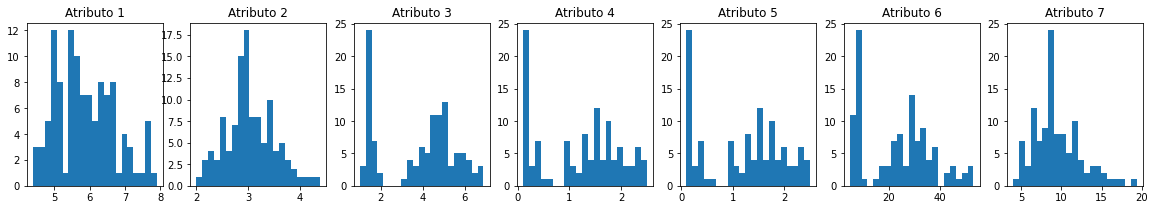

None


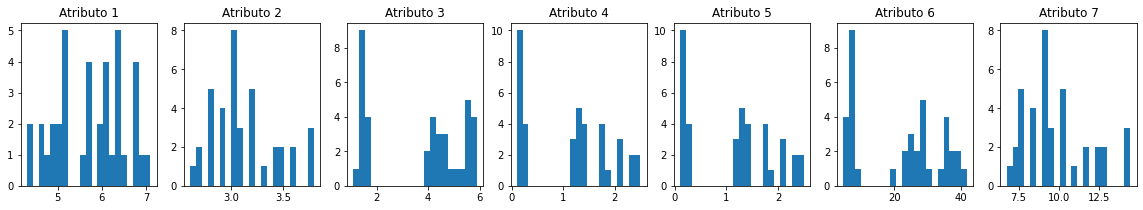

None


In [53]:
# ANALISIS 4. TOMANDO COMO RERENCIA ESTO; MIRO LAS HISTOGRAMAS DE LOS DATOS x_train Y LUEGO x_test
# plt.figure(figsize=(20, 3))
# for i, x_i in enumerate(x.T):
#   plt.subplot(1,x.shape[1],i+1)
#   plt.hist(x_i, bins=21)
#   plt.title("Atributo "+str(i+1))
# print(plt.show())

plt.figure(figsize=(20, 3))
for i, x_i in enumerate(x_train.T):
  plt.subplot(1,x_train.shape[1],i+1)
  plt.hist(x_i, bins=21)
  plt.title("Atributo "+str(i+1))
print(plt.show())

plt.figure(figsize=(20, 3))
for i, x_i in enumerate(x_test.T):
  plt.subplot(1,x_test.shape[1],i+1)
  plt.hist(x_i, bins=21)
  plt.title("Atributo "+str(i+1))
print(plt.show())

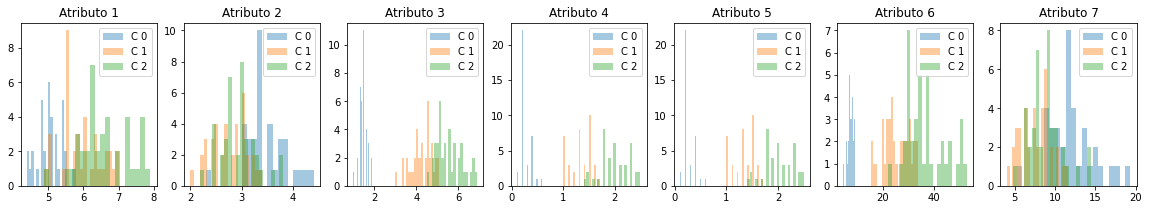

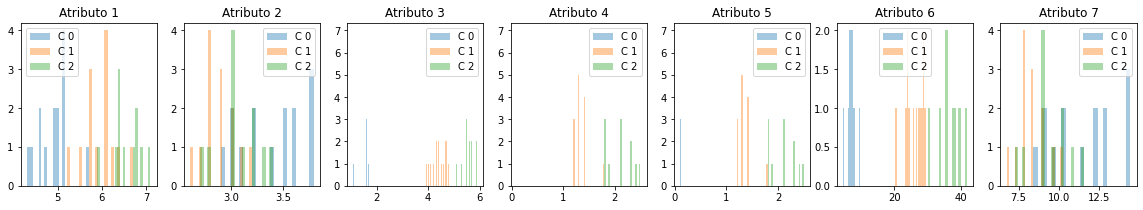

In [54]:
# ANALISIS 5. TOMANDO COMO RERENCIA ESTO; MIRO LAS HISTOGRAMAS DE RELACIONES ENTRE LOS DATOS x_train Y LUEGO x_test
# plt.figure(figsize=(20, 3))
# for i, x_i in enumerate(x.T):
#   plt.subplot(1,x.shape[1],i+1)
#   for c in np.unique(t):
#     plt.hist(x_i[t[:, 0] == c], bins=21, label="C "+str(c), alpha=0.4)
#   plt.title("Atributo "+str(i+1))
#   plt.legend()
# plt.show()

plt.figure(figsize=(20, 3))
for i, x_i in enumerate(x_train.T):
  plt.subplot(1,x_train.shape[1],i+1)
  for c in np.unique(t_train):
    plt.hist(x_i[t_train[:, 0] == c], bins=21, label="C "+str(c), alpha=0.4)
  plt.title("Atributo "+str(i+1))
  plt.legend()
plt.show()

plt.figure(figsize=(20, 3))
for i, x_i in enumerate(x_test.T):
  plt.subplot(1,x_test.shape[1],i+1)
  for c in np.unique(t_test):
    plt.hist(x_i[t_test[:, 0] == c], bins=21, label="C "+str(c), alpha=0.4)
  plt.title("Atributo "+str(i+1))
  plt.legend()
plt.show()

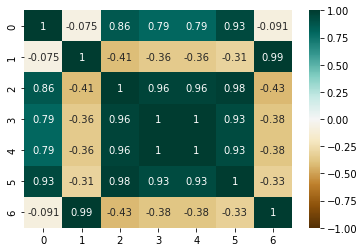

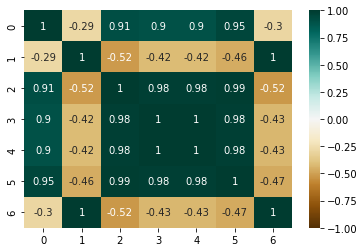

In [55]:
# ANALISIS 5. TOMANDO COMO RERENCIA ESTO; MIRO LA MATRIZ DE CORRELACION /COVARIANZA PARA VER QUE CARACTERITICAS IENE ALTA CCORRELACION ENTRE ELLAS.
# eSTO ES LO QUE MAS CLARAMENTE INFORMACION ME DA DE CARACTERITICAS SEMEJANES.
#sns.heatmap(np.corrcoef(x.T), vmin=-1, vmax=1, annot=True, cmap='BrBG')
#plt.show()
sns.heatmap(np.corrcoef(x_train.T), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()
sns.heatmap(np.corrcoef(x_test.T), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

<font color="#CA3532">[6.2]</font> [0.25 puntos] Crea un modelo que resuelva el problema del Iris dataset modificado.

Requisitos para puntuar el ejercicio:

1. El modelo no debe tener más de 120 parámetros.

2. Se debe alcanzar más de un 90% de accuracy en test.

3. La primera capa densa del modelo debe tener activación ``tanh``.

In [56]:
model = keras.Sequential()

#-------------------------------------------------------------
# TO-DO: Incluye aquí las capas necesarias. 
# problema-multiclase. Segun los apuntes de Luis, Funcion de coste ha de ser cross-entropy (categorica) y la saida de red (softmax)
# relu y variantes son las que mejor resultado dan en validación en general.
# Redes normales (feedforward) --> relu o variantes
# Redes CNN --> relu o variantes
# Redes RNN --> tanh
# Sigmoid no se utiliza nunca excepto para la capa de salida si es clasificacion binaria

# BASADO EN EN LO EXPUESTO ANTERIOR Y EL ENUNCIADO CREO ESTE MODELO

model.add(keras.layers.Input(shape=(7,))) # numero de caracteristicas
model.add(keras.layers.Dense(5, activation='tanh'))
model.add(keras.layers.Dense(7, activation='relu'))
model.add(keras.layers.Dense(3,activation="softmax")) # numero de posibles salidas al hacer to_categorical
#-------------------------------------------------------------

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 5)                 40        
                                                                 
 dense_6 (Dense)             (None, 7)                 42        
                                                                 
 dense_7 (Dense)             (None, 3)                 24        
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


Compila el modelo, utilizando un optimizador Adam y la función de coste más apropiada para este problema. Tenéis libertad para utilizar cualquier función de coste (https://keras.io/api/losses/). El learning rate lo deberás ajustar para que el entrenamiento converja:

In [57]:
#-------------------------------------------------------------
# TO-DO: Compila el modelo
learning_rate = 0.01
loss = 'categorical_crossentropy'
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss=loss,
              metrics=['acc'])

from tensorflow.keras.utils import to_categorical
t_train = to_categorical(t_train)
print(t_train)
t_test = to_categorical(t_test)
print(t_test)
#-------------------------------------------------------------

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1.

La siguiente celda ajusta tu modelo a los datos y muestra gráficamente el resultado:

Epoch 1/200
4/4 [==============================] - 2s 150ms/step - loss: 1.4112 - acc: 0.3482 - val_loss: 1.1577 - val_acc: 0.5526
Epoch 2/200
4/4 [==============================] - 0s 22ms/step - loss: 1.0110 - acc: 0.5982 - val_loss: 0.8460 - val_acc: 0.6579
Epoch 3/200
4/4 [==============================] - 0s 30ms/step - loss: 0.7786 - acc: 0.6607 - val_loss: 0.6888 - val_acc: 0.6579
Epoch 4/200
4/4 [==============================] - 0s 23ms/step - loss: 0.6688 - acc: 0.6696 - val_loss: 0.6140 - val_acc: 0.6579
Epoch 5/200
4/4 [==============================] - 0s 26ms/step - loss: 0.6170 - acc: 0.6696 - val_loss: 0.5664 - val_acc: 0.6579
Epoch 6/200
4/4 [==============================] - 0s 26ms/step - loss: 0.5840 - acc: 0.6696 - val_loss: 0.5351 - val_acc: 0.6579
Epoch 7/200
4/4 [==============================] - 0s 26ms/step - loss: 0.5618 - acc: 0.6696 - val_loss: 0.5122 - val_acc: 0.6579
Epoch 8/200
4/4 [==============================] - 0s 22ms/step - loss: 0.5418 - acc: 0.6

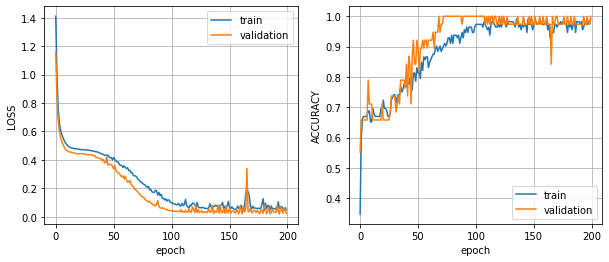

In [58]:
history = model.fit(x_train, t_train, epochs=200, verbose=1, validation_data=(x_test, t_test))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="validation")
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('LOSS')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label="train")
plt.plot(history.history['val_acc'], label="validation")
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

In [59]:
assert model.count_params() < 120, "[FAIL] El número de parámetros es mayor que 120"
assert np.around(model.evaluate(x_test, t_test, verbose=0)[-1], decimals=4) >= 0.9, "[FAIL] El modelo no obtiene un accuracy en validación mayor a 0.9"
assert model.layers[0].activation == keras.activations.tanh, "[FAIL] La primera capa no tiene función de activación tanh"
print("[OK] Requisitos cumplidos")

[OK] Requisitos cumplidos


**Análisis de los pesos de entrada de un modelo**

Vamos a analizar los pesos de la primera capa densa del modelo para intentar comprender qué atributos de entrada son relevantes. Primero vamos a verlo con un ejemplo. 

In [60]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(10,)))
model.add(keras.layers.Dense(5))
model.add(keras.layers.Dense(7))
model.add(keras.layers.Dense(2))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 7)                 42        
                                                                 
 dense_10 (Dense)            (None, 2)                 16        
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


Tenemos que acceder a las capas del modelo mediante ``model.layers``:

In [61]:
model.layers

Como veis, ``layers`` es una lista con todas las capas del modelo. Ahora, para acceder a los pesos de una capa debemos utilizar la variable ``weights`` de la capa:

In [62]:
model.layers[0].weights

[<tf.Variable 'dense_8/kernel:0' shape=(10, 5) dtype=float32, numpy=
 array([[-0.45782602,  0.4337656 , -0.47265658, -0.34020504, -0.46510777],
        [-0.54431474, -0.51766807,  0.02196985, -0.2756587 , -0.23530194],
        [-0.2114572 ,  0.0981999 ,  0.09269053,  0.2770918 , -0.22217378],
        [-0.54123366,  0.02914077, -0.2352255 , -0.13102973, -0.06597656],
        [-0.5308636 ,  0.41465825, -0.38745165, -0.61742336, -0.14048633],
        [-0.53908235,  0.21266246,  0.14114785, -0.4888545 ,  0.5594087 ],
        [ 0.28119236, -0.2571908 ,  0.13692999,  0.5561984 , -0.40272915],
        [-0.00984424, -0.14053443,  0.5796065 , -0.1882714 ,  0.52026206],
        [ 0.5049146 , -0.02179945,  0.2612933 , -0.18382645, -0.14659435],
        [-0.24880555,  0.08035344, -0.373415  ,  0.21386802,  0.34819764]],
       dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>]

Como veis, ``weights`` es también una lista, en este caso con su matriz de pesos ``W`` y su bias ``b``. Podemos recogerlos directamente:

In [63]:
w = model.layers[0].weights[0].numpy()
b = model.layers[0].weights[1].numpy()

Una manera de plantear el análisis de los pesos que son relevantes podría ser acumular el valor de cada peso que sale de cada neurona de entrada. Sin embargo, hay que considerar que hay pesos negativos. Por tanto, una idea podría ser calcular el valor absoluto de los pesos para luego sumar:

In [64]:
# Si sumamos tal cual, tenemos el acumulado de todos los pesos.
np.abs(w).sum()

15.156562

In [65]:
# Si sumamos con axis=0, podemos ver la suma de pesos que van a cada neurona de destino
np.abs(w).sum(axis=0) 

array([3.8695343, 2.2059734, 2.7023869, 3.2724276, 3.1062381],
      dtype=float32)

In [66]:
# Si sumamos con axis=1, podemos ver la suma de pesos que salen de cada neurona de origen
np.abs(w).sum(axis=1) 

array([2.169561  , 1.5949134 , 0.90161324, 1.0026062 , 2.090883  ,
       1.9411559 , 1.6342407 , 1.4385185 , 1.1184281 , 1.2646396 ],
      dtype=float32)

En nuestro caso, queremos ver qué atributos de entrada son relevantes, por lo que nos interesa sumar con ``axis = 1``. Ahora podemos generar una figura de barras con los valores de los pesos:

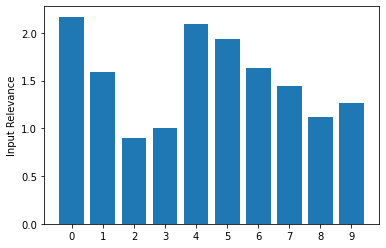

In [67]:
relevancia_inputs = np.abs(w).sum(axis=1)
plt.bar(np.arange(10), relevancia_inputs)
plt.xticks(np.arange(10))
plt.ylabel("Input Relevance")
plt.show()

Un último detalle sería normalizar el resultado anterior para extraer el porcentaje de relevancia de cada uno de los atributos de entrada. Para ello dividimos entre la suma de todos los pesos:

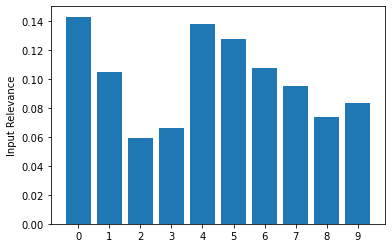

In [68]:
relevancia_inputs = np.abs(w).sum(axis=1)
plt.bar(np.arange(10), relevancia_inputs/relevancia_inputs.sum())
plt.xticks(np.arange(10))
plt.ylabel("Input Relevance")
plt.show()

Al estar probando este análisis con los pesos de un modelo recién inicializado (sin entrenar), es coherente que el resultado tenga un aspecto random.

#### <font color="#CA3532">Ejercicio 7</font> [1.5 puntos]

En este ejercicio vais a probar el análisis previo con un par de modelos nuevos. Para ello, vamos a utilizar exactamente el mismo dataset que en el ejercicio anterior.

In [69]:
x_train, x_test, t_train, t_test = load_data_iris()

<font color="#CA3532">[7.1]</font> [0.5 puntos] Crea de nuevo un modelo que resuelva el problema del Iris dataset modificado (puedes utilizar el mismo código que en el ejercicio anterior) y analiza los pesos de la primera capa densa del modelo para intentar comprender qué atributos de entrada son relevantes.

Requisitos para puntuar el ejercicio:

1. El modelo no debe tener más de 120 parámetros.

2. Se debe alcanzar más de un 90% de accuracy en test.

3. La primera capa densa del modelo debe tener activación ``tanh``.

In [70]:
model = keras.Sequential()

#-------------------------------------------------------------
# TO-DO: Incluye aquí las capas necesarias
model.add(keras.layers.Input(shape=(7,))) # numero de caracteristicas
model.add(keras.layers.Dense(5, activation='tanh'))
model.add(keras.layers.Dense(7, activation='relu'))
model.add(keras.layers.Dense(3,activation="softmax")) # numero de posibles salidas al hacer to_categorical
#-------------------------------------------------------------

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 5)                 40        
                                                                 
 dense_12 (Dense)            (None, 7)                 42        
                                                                 
 dense_13 (Dense)            (None, 3)                 24        
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


Compila el modelo, utilizando un optimizador Adam y la función de coste más apropiada para este problema. Tenéis libertad para utilizar cualquier función de coste (https://keras.io/api/losses/). El learning rate lo deberás ajustar para que el entrenamiento converja:

In [71]:
#-------------------------------------------------------------
# TO-DO: Compila el modelo
learning_rate = 0.01
loss = 'categorical_crossentropy'
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss=loss,
              metrics=['acc'])
#-------------------------------------------------------------
from tensorflow.keras.utils import to_categorical
t_train = to_categorical(t_train)
print(t_train)
t_test = to_categorical(t_test)
print(t_test)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1.

La siguiente celda ajusta tu modelo a los datos y muestra gráficamente el resultado:

Epoch 1/200
4/4 [==============================] - 2s 124ms/step - loss: 1.4127 - acc: 0.3214 - val_loss: 1.1895 - val_acc: 0.3684
Epoch 2/200
4/4 [==============================] - 0s 19ms/step - loss: 1.1773 - acc: 0.3214 - val_loss: 1.0678 - val_acc: 0.3684
Epoch 3/200
4/4 [==============================] - 0s 19ms/step - loss: 1.0963 - acc: 0.3571 - val_loss: 1.0523 - val_acc: 0.6316
Epoch 4/200
4/4 [==============================] - 0s 20ms/step - loss: 1.0614 - acc: 0.5536 - val_loss: 1.0297 - val_acc: 0.6053
Epoch 5/200
4/4 [==============================] - 0s 20ms/step - loss: 1.0276 - acc: 0.4554 - val_loss: 1.0025 - val_acc: 0.6579
Epoch 6/200
4/4 [==============================] - 0s 21ms/step - loss: 0.9914 - acc: 0.6696 - val_loss: 0.9592 - val_acc: 0.6579
Epoch 7/200
4/4 [==============================] - 0s 20ms/step - loss: 0.9478 - acc: 0.6696 - val_loss: 0.9091 - val_acc: 0.6842
Epoch 8/200
4/4 [==============================] - 0s 23ms/step - loss: 0.9116 - acc: 0.7

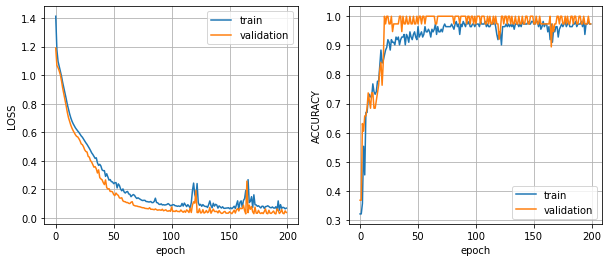

In [72]:
history = model.fit(x_train, t_train, epochs=200, verbose=1, validation_data=(x_test, t_test))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="validation")
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('LOSS')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label="train")
plt.plot(history.history['val_acc'], label="validation")
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

In [73]:
assert model.count_params() < 120, "[FAIL] El número de parámetros es mayor que 120"
assert np.around(model.evaluate(x_test, t_test, verbose=0)[-1], decimals=4) >= 0.9, "[FAIL] El modelo no obtiene un accuracy en validación mayor a 0.9"
assert model.layers[0].activation == keras.activations.tanh, "[FAIL] La primera capa no tiene función de activación tanh"
print("[OK] Requisitos cumplidos")

[OK] Requisitos cumplidos


Ahora dibuja la figura de barras de los pesos de la capa de entrada considerando los puntos detallados previamente.

[<tf.Variable 'dense_11/kernel:0' shape=(7, 5) dtype=float32, numpy=
array([[ 0.68568695, -1.0086743 , -0.40632564,  0.8642729 , -0.24307944],
       [ 0.29306987,  0.43120983, -0.17825918,  0.24701211,  0.35495204],
       [ 0.48377326, -0.21578535,  0.77525395,  0.6346844 ,  0.95334965],
       [-0.4696776 ,  1.2752306 ,  0.3777979 ,  0.38778898,  0.2314495 ],
       [-0.46298572,  0.64825064,  0.2487345 ,  0.2750354 ,  0.47579217],
       [-0.6585675 ,  0.16538274,  0.51724535, -0.04475664,  0.15449686],
       [ 0.33494774, -0.1942207 ,  0.43632984,  0.1936298 , -0.39120775]],
      dtype=float32)>, <tf.Variable 'dense_11/bias:0' shape=(5,) dtype=float32, numpy=
array([ 0.37293133, -0.21677513,  0.14573728,  0.15170997, -0.14561331],
      dtype=float32)>] [[ 0.68568695 -1.0086743  -0.40632564  0.8642729  -0.24307944]
 [ 0.29306987  0.43120983 -0.17825918  0.24701211  0.35495204]
 [ 0.48377326 -0.21578535  0.77525395  0.6346844   0.95334965]
 [-0.4696776   1.2752306   0.3777979   0

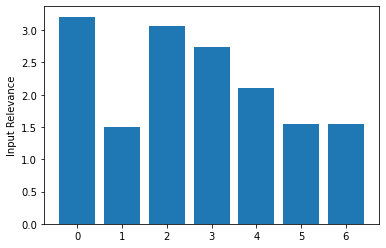

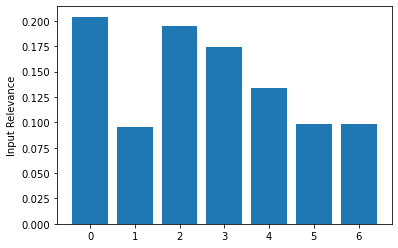

In [74]:
#-------------------------------------------------------------
# TO-DO: Incluye aquí el código necesario para calcular w
#   además, incluye el código para mostrar la figura
w = model.layers[0].weights[0].numpy()
b = model.layers[0].weights[1].numpy()
print(model.layers[0].weights, w , b, np.abs(w).sum(), np.abs(w).sum(axis=0), np.abs(w).sum(axis=1))
relevancia_inputs = np.abs(w).sum(axis=1)
plt.bar(np.arange(7), relevancia_inputs)
plt.xticks(np.arange(7))
plt.ylabel("Input Relevance")
plt.show()


# ENTIENDO QUE HE DE USAR LA EQUIVALENTE A 
# "Un último detalle sería normalizar el resultado anterior para extraer el porcentaje de relevancia de cada uno de los 
# atributos de entrada. Para ello dividimos entre la suma de todos los pesos:" 
# ENTIENDO QUE ESTA SEGUNDA ES LA QUE MAS CLARAMENTE DATA DARIA
relevancia_inputs = np.abs(w).sum(axis=1)
plt.bar(np.arange(7), relevancia_inputs/relevancia_inputs.sum())
plt.xticks(np.arange(7))
plt.ylabel("Input Relevance")
plt.show()
#-------------------------------------------------------------

In [75]:
# HICE ESTO DESPUES PARA VE COMO EVOLUCIONAN LOS PESOS; PERO NO SE PIDO. POR ESO LO PONGO COMENTADO
# informacion de los pesos de la primera capa oculta
# w = model.layers[1].weights[0].numpy()
# b = model.layers[1].weights[1].numpy()
# print(model.layers[1].weights, w , b, np.abs(w).sum(), np.abs(w).sum(axis=0), np.abs(w).sum(axis=1))
# relevancia_inputs = np.abs(w).sum(axis=1)
# plt.bar(np.arange(5), relevancia_inputs)
# plt.xticks(np.arange(5))
# plt.ylabel("Input Relevance")
# plt.show()

# relevancia_inputs = np.abs(w).sum(axis=1)
# plt.bar(np.arange(5), relevancia_inputs/relevancia_inputs.sum())
# plt.xticks(np.arange(5))
# plt.ylabel("Input Relevance")
# plt.show()

In [76]:
# HICE ESTO DESPUES PARA VE COMO EVOLUCIONAN LOS PESOS; PERO NO SE PIDO. POR ESO LO PONGO COMENTADO
# informacion de los pesos de la segunda capa oculta
# w = model.layers[2].weights[0].numpy()
# b = model.layers[2].weights[1].numpy()
# print(model.layers[2].weights, w , b, np.abs(w).sum(), np.abs(w).sum(axis=0), np.abs(w).sum(axis=1))
# relevancia_inputs = np.abs(w).sum(axis=1)
# plt.bar(np.arange(7), relevancia_inputs)
# plt.xticks(np.arange(7))
# plt.ylabel("Input Relevance")
# plt.show()

# relevancia_inputs = np.abs(w).sum(axis=1)
# plt.bar(np.arange(7), relevancia_inputs/relevancia_inputs.sum())
# plt.xticks(np.arange(7))
# plt.ylabel("Input Relevance")
# plt.show()

¿Qué conclusiones podemos sacar de la figura? Indícalas en la siguiente celda:

In [77]:

# COMO SE VE EN LA MATRIZ DE CORRELACIÓN QUE SE PRESENTÓ EN EL EJERCICIO ANTERIOR NO SE VEN ESTÁN 
# CONCLUSIONES; YA QUE ESTAN LOS PESOS DISTRIBUIDOS DE UNA FORMA MAS O MENOS UNIFORME POR TODAS LAS 
# NEURONAS DE LA CAPA DE ENTRADA. POR ESO SE DEBERIA REGULARIZAR CON l2; COMO SE PIDE MAS TARDE.
# COMO SE DIJO EN CLASE L1 PUEDE IDENTIFICAR LOS ATRIBUTOS REDUNDANES, POR EJEMPLO PARA ANULARLOS.
# EN CASO DE QUERER SIMPLIFICAR EL MODELO DEBEMOS USAR L2

# ADEMAS EN LA PARTE DE HISTOGRAMAS DE COLOR POR ATRIBUTO QUE EL COLOR ES POR C=0,1 O 2; SE VE:
# A) ABRIBUTOS 3,4,5 Y 6 QUE SON LAS CARACTERISTICAS 2,3,4,5; SEPARAN MUY BIEN
# EN TRAIN COMO EN TEST EL C = 0 CON RESPECTO AL C = 1 Y C = 2.
# B) ATRIBUTO 2 Y 7; QUE SON LAS CARACTERISTICAS 1 Y 6; SON CASI IDENTICAS EN TRAIN Y TEST.
# SE VE MUY BIEN EN LA GRAFICA DE TEST.

# LO QUE VEO EN LA MATRIZ DE COVARIANCA/ CORRELACION ES:
# A) LA CARACTERÍSTICA 1 TIENE UNA CORRELACIÓN TOTAL CON LA CARACTERÍSTICA 6. SI SALVAMOS LA 6,
# PODEMOS QUITAR LA 1; O VICEVERSA
# B) LA CARACTERÍSTICA 5 TIENE UNA CORRELACIÓN ALTÍSIMA CON LAS CAPAS 0,2(CON ESTA CAPA LA CORRELACIÓN 
# ES CASI TOTAL),3 Y 4. POR LO TANTO PODEMOS QUITAR LA 5 Y SALVAR LA 0,2,3 Y 4; o quedarnos con la 5
# C) LA CARACTERÍSTICA 2 TIENE UNA CORRELACIÓN ALTÍSIMA CON LAS CAPAS 3,4,5; POR ESO ESPERO CUANDO 
# REGULARICE CON L2 QUE LE DE POCO PESO.


<font color="#CA3532">[7.2]</font> [0.5 puntos] Crea de nuevo un modelo que resuelva el problema del Iris dataset modificado, añadiendo regularización L2 y analiza los pesos de la primera capa densa del modelo para intentar comprender qué atributos de entrada son relevantes. Conviene dejar más épocas durante el entrenamiento para que la penalización por regularización tenga el efecto deseado.

Requisitos para puntuar el ejercicio:

1. El modelo no debe tener más de 120 parámetros.

2. Se debe alcanzar más de un 90% de accuracy en test.

3. La primera capa densa del modelo debe tener activación ``tanh``.

4. La suma de pesos en valor absoluto de la primera capa del modelo no debe superar 2.0.

In [78]:
model = keras.Sequential()

#-------------------------------------------------------------
# TO-DO: Incluye aquí las capas necesarias
l2reg = 0.3 # USO UNA L2REG DE 0.3 Y VEO QUE ME SALE; SI CUMPLO LO QUE ESPERO AL VER LA MATRIZ DE COVARIANZA
# l2reg = 0.5 # ME SALEN VALORES PARECIDOS EN PESOS NORMALIZADOS EN CAPA INPUT PERO GRAFICAS PEORES
# l2reg = 0.1 # ME DA EL ERROR El modelo no ha regularizado los pesos de entrada tanto como se esperaba
model.add(keras.layers.Input(shape=(7,))) # numero de caracteristicas
model.add(keras.layers.Dense(5, activation='tanh',kernel_regularizer=tf.keras.regularizers.l2(l2reg)))
model.add(keras.layers.Dense(7, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2reg)))
model.add(keras.layers.Dense(3,activation="softmax")) # numero de posibles salidas al hacer to_categorical
#-------------------------------------------------------------

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 5)                 40        
                                                                 
 dense_15 (Dense)            (None, 7)                 42        
                                                                 
 dense_16 (Dense)            (None, 3)                 24        
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


Compila el modelo, utilizando un optimizador Adam y la función de coste más apropiada para este problema. Tenéis libertad para utilizar cualquier función de coste (https://keras.io/api/losses/). El learning rate lo deberás ajustar para que el entrenamiento converja:

In [79]:
#-------------------------------------------------------------
# TO-DO: Compila el modelo
learning_rate = 0.01
loss = 'categorical_crossentropy'
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss=loss,
              metrics=['acc'])
#-------------------------------------------------------------

La siguiente celda ajusta tu modelo a los datos y muestra gráficamente el resultado:

Epoch 1/500
4/4 [==============================] - 2s 126ms/step - loss: 4.5625 - acc: 0.1071 - val_loss: 3.9963 - val_acc: 0.5526
Epoch 2/500
4/4 [==============================] - 0s 19ms/step - loss: 3.8113 - acc: 0.5804 - val_loss: 3.4407 - val_acc: 0.7105
Epoch 3/500
4/4 [==============================] - 0s 20ms/step - loss: 3.3065 - acc: 0.7411 - val_loss: 2.9955 - val_acc: 0.9474
Epoch 4/500
4/4 [==============================] - 0s 19ms/step - loss: 2.8748 - acc: 0.8125 - val_loss: 2.6174 - val_acc: 0.6579
Epoch 5/500
4/4 [==============================] - 0s 17ms/step - loss: 2.5090 - acc: 0.6696 - val_loss: 2.2847 - val_acc: 0.6579
Epoch 6/500
4/4 [==============================] - 0s 20ms/step - loss: 2.1955 - acc: 0.6696 - val_loss: 2.0004 - val_acc: 0.6579
Epoch 7/500
4/4 [==============================] - 0s 19ms/step - loss: 1.9303 - acc: 0.6696 - val_loss: 1.7590 - val_acc: 0.6579
Epoch 8/500
4/4 [==============================] - 0s 19ms/step - loss: 1.7060 - acc: 0.6

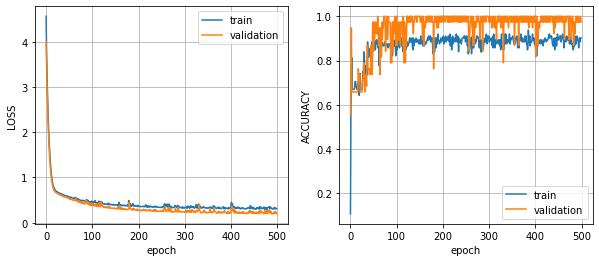

In [80]:
history = model.fit(x_train, t_train, epochs=500, verbose=1, validation_data=(x_test, t_test))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="validation")
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('LOSS')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label="train")
plt.plot(history.history['val_acc'], label="validation")
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

In [81]:
assert model.count_params() < 120, "[FAIL] El número de parámetros es mayor que 120"
assert np.around(model.evaluate(x_test, t_test, verbose=0)[-1], decimals=4) >= 0.9, "[FAIL] El modelo no obtiene un accuracy en validación mayor a 0.9"
assert model.layers[0].activation == keras.activations.tanh, "[FAIL] La primera capa no tiene función de activación tanh"
assert np.abs(model.layers[0].weights[0].numpy()).sum() <= 2.0, "[FAIL] El modelo no ha regularizado los pesos de entrada tanto como se esperaba"
print("[OK] Requisitos cumplidos")

[OK] Requisitos cumplidos


In [82]:
np.abs(model.layers[0].weights[0].numpy()).sum()

1.7422227

Ahora dibuja la figura de barras de los pesos de la capa de entrada considerando los puntos detallados previamente.

[<tf.Variable 'dense_14/kernel:0' shape=(7, 5) dtype=float32, numpy=
array([[-0.00227541,  0.00253575, -0.07750695,  0.0587328 ,  0.08061724],
       [-0.01180174,  0.01223061, -0.0085722 ,  0.0074842 ,  0.00839758],
       [ 0.02280159, -0.02261869,  0.06641351, -0.05104974, -0.07017661],
       [ 0.01328586, -0.01323637,  0.0828095 , -0.06289779, -0.08720497],
       [ 0.01316346, -0.01326294,  0.08280632, -0.06289906, -0.08720735],
       [ 0.11186848, -0.11149977,  0.08002881, -0.06776462, -0.08404741],
       [-0.06524225,  0.0657196 , -0.0465332 ,  0.04041467,  0.04711561]],
      dtype=float32)>, <tf.Variable 'dense_14/bias:0' shape=(5,) dtype=float32, numpy=
array([-0.9529781 ,  0.94255465, -2.1084094 ,  1.6717097 ,  2.2556705 ],
      dtype=float32)>] [[-0.00227541  0.00253575 -0.07750695  0.0587328   0.08061724]
 [-0.01180174  0.01223061 -0.0085722   0.0074842   0.00839758]
 [ 0.02280159 -0.02261869  0.06641351 -0.05104974 -0.07017661]
 [ 0.01328586 -0.01323637  0.0828095  -0

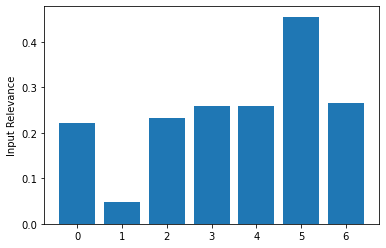

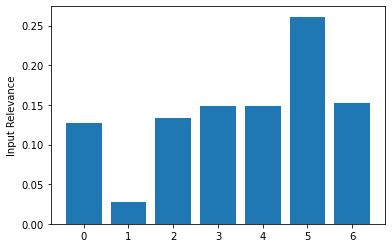

In [83]:
#-------------------------------------------------------------
# TO-DO: Incluye aquí el código necesario para calcular w
#   además, incluye el código para mostrar la figura
w = model.layers[0].weights[0].numpy()
b = model.layers[0].weights[1].numpy()
print(model.layers[0].weights, w , b, np.abs(w).sum(), np.abs(w).sum(axis=0), np.abs(w).sum(axis=1))
relevancia_inputs = np.abs(w).sum(axis=1)
plt.bar(np.arange(7), relevancia_inputs)
plt.xticks(np.arange(7))
plt.ylabel("Input Relevance")
plt.show()


# ESTA ES LA QUE TENGO QUE VER MEJOR PARA ANALIZAR SI HACE LO QU EESPERO AL VER LA MATRIZ DE COVARIANZA
relevancia_inputs = np.abs(w).sum(axis=1)
plt.bar(np.arange(7), relevancia_inputs/relevancia_inputs.sum())
plt.xticks(np.arange(7))
plt.ylabel("Input Relevance")
plt.show()
#-------------------------------------------------------------

¿Qué conclusiones podemos sacar de la figura? Indícalas en la siguiente celda:

In [84]:
# En el caso en que queramos "simplificar" el modelo usamos L2
# 1) QUE LA NEURONA 1 LA PUEDO QUITAR YA QUE LE DA MUY POCOS PESOS
# 1) QUE COMO LAS CARACTERISTICAS 6  Y 1 ERAN CASI IDENTICAS, PUES LE PONE MAS PESOS EN LA 6 
# Y HACE QUE LA 1 NO CUENTE NADA
# 2) COMO LA CARACTERISTICA 5 ES LA QUE ENGLOVA MAS RELACION CON OTRAS CARACTERISTICAS (0,2,3,4), 
# LE DA MUCHO MAS PESO Y LA 0,2,3,4, LAS PONEN PESO MAS SEMEJANTES
# 3) COMO LA 2 TIENE MUCHAS CORRELACION CON 3 Y 4; LE PONE PESOS PARECIDOS. ESPERO QUE SE VEA CON EL L1

<font color="#CA3532">[7.3]</font> [0.5 puntos] Crea de nuevo un modelo que resuelva el problema del Iris dataset modificado, añadiendo regularización L1 y analiza los pesos de la primera capa densa del modelo para intentar comprender qué atributos de entrada son relevantes. Conviene dejar más épocas durante el entrenamiento para que la penalización por regularización tenga el efecto deseado.

Requisitos para puntuar el ejercicio:

1. El modelo no debe tener más de 120 parámetros.

2. Se debe alcanzar más de un 90% de accuracy en test.

3. La primera capa densa del modelo debe tener activación ``tanh``.

4. La suma de pesos en valor absoluto de la primera capa del modelo no debe superar 2.0.

In [85]:
model = keras.Sequential()

#-------------------------------------------------------------
# TO-DO: Incluye aquí las capas necesarias
l1reg = 0.1
model.add(keras.layers.Input(shape=(7,))) # numero de caracteristicas
model.add(keras.layers.Dense(5, activation='tanh',kernel_regularizer=tf.keras.regularizers.l1(l1reg)))
model.add(keras.layers.Dense(7, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1reg)))
model.add(keras.layers.Dense(3,activation="softmax")) # numero de posibles salidas al hacer to_categorical
#-------------------------------------------------------------

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 5)                 40        
                                                                 
 dense_18 (Dense)            (None, 7)                 42        
                                                                 
 dense_19 (Dense)            (None, 3)                 24        
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


Compila el modelo, utilizando un optimizador Adam y la función de coste más apropiada para este problema. Tenéis libertad para utilizar cualquier función de coste (https://keras.io/api/losses/). El learning rate lo deberás ajustar para que el entrenamiento converja:

In [86]:
#-------------------------------------------------------------
# TO-DO: Compila el modelo
learning_rate = 0.01
loss = 'categorical_crossentropy'
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss=loss,
              metrics=['acc'])
#-------------------------------------------------------------

La siguiente celda ajusta tu modelo a los datos y muestra gráficamente el resultado:

Epoch 1/500
4/4 [==============================] - 2s 107ms/step - loss: 3.3944 - acc: 0.3304 - val_loss: 3.1279 - val_acc: 0.3421
Epoch 2/500
4/4 [==============================] - 0s 17ms/step - loss: 3.0636 - acc: 0.3304 - val_loss: 2.8571 - val_acc: 0.7105
Epoch 3/500
4/4 [==============================] - 0s 20ms/step - loss: 2.7936 - acc: 0.7768 - val_loss: 2.6228 - val_acc: 0.7895
Epoch 4/500
4/4 [==============================] - 0s 21ms/step - loss: 2.5627 - acc: 0.7321 - val_loss: 2.4163 - val_acc: 0.6579
Epoch 5/500
4/4 [==============================] - 0s 20ms/step - loss: 2.3542 - acc: 0.6786 - val_loss: 2.2245 - val_acc: 0.6579
Epoch 6/500
4/4 [==============================] - 0s 19ms/step - loss: 2.1656 - acc: 0.6696 - val_loss: 2.0337 - val_acc: 0.6579
Epoch 7/500
4/4 [==============================] - 0s 20ms/step - loss: 1.9803 - acc: 0.6696 - val_loss: 1.8485 - val_acc: 0.6579
Epoch 8/500
4/4 [==============================] - 0s 22ms/step - loss: 1.8013 - acc: 0.6

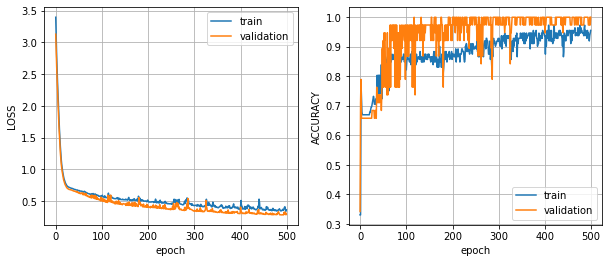

In [87]:
history = model.fit(x_train, t_train, epochs=500, verbose=1, validation_data=(x_test, t_test))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="validation")
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('LOSS')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label="train")
plt.plot(history.history['val_acc'], label="validation")
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

In [88]:
assert model.count_params() < 120, "[FAIL] El número de parámetros es mayor que 120"
assert np.around(model.evaluate(x_test, t_test, verbose=0)[-1], decimals=4) >= 0.9, "[FAIL] El modelo no obtiene un accuracy en validación mayor a 0.9"
assert model.layers[0].activation == keras.activations.tanh, "[FAIL] La primera capa no tiene función de activación tanh"
assert np.abs(model.layers[0].weights[0].numpy()).sum() <= 2.0, "[FAIL] El modelo no ha regularizado los pesos de entrada tanto como se esperaba"
print("[OK] Requisitos cumplidos")

[OK] Requisitos cumplidos


In [89]:
np.abs(model.layers[0].weights[0].numpy()).sum()

0.86127937

Ahora dibuja la figura de barras de los pesos de la capa de entrada considerando los puntos detallados previamente.

[<tf.Variable 'dense_17/kernel:0' shape=(7, 5) dtype=float32, numpy=
array([[ 9.0417988e-04,  3.6324246e-04,  2.2467170e-03,  6.8129323e-02,
        -5.4378633e-04],
       [ 6.4702320e-04,  7.7187520e-05, -1.2493873e-04,  6.4234127e-04,
        -1.4135679e-03],
       [ 9.8528259e-04,  5.9169438e-04,  1.1638980e-03, -9.7164072e-02,
         9.6238061e-04],
       [ 3.2586590e-03, -9.5895282e-04, -4.7618739e-04, -2.8933102e-01,
        -1.6613520e-03],
       [ 7.6901511e-04,  4.0806285e-03, -6.6890183e-04, -2.9092413e-01,
         1.1126893e-03],
       [ 7.1519043e-04,  1.3448170e-03, -1.1714164e-03, -2.5936585e-02,
        -7.5122202e-03],
       [-2.2715272e-04,  6.7326642e-04, -1.8482275e-03,  5.2592702e-02,
        -5.6583769e-05]], dtype=float32)>, <tf.Variable 'dense_17/bias:0' shape=(5,) dtype=float32, numpy=
array([ 0.05297908, -0.01265927,  0.00157036,  0.9786073 , -0.02888367],
      dtype=float32)>] [[ 9.0417988e-04  3.6324246e-04  2.2467170e-03  6.8129323e-02
  -5.4378633

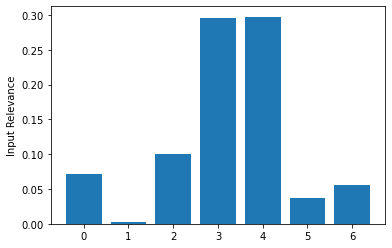

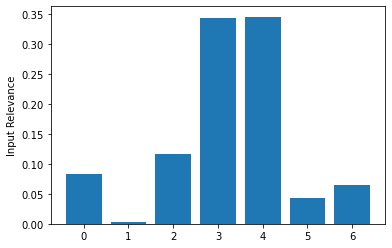

In [90]:
#-------------------------------------------------------------
# TO-DO: Incluye aquí el código necesario para calcular w
#   además, incluye el código para mostrar la figura
w = model.layers[0].weights[0].numpy()
b = model.layers[0].weights[1].numpy()
print(model.layers[0].weights, w , b, np.abs(w).sum(), np.abs(w).sum(axis=0), np.abs(w).sum(axis=1))
relevancia_inputs = np.abs(w).sum(axis=1)
plt.bar(np.arange(7), relevancia_inputs)
plt.xticks(np.arange(7))
plt.ylabel("Input Relevance")
plt.show()

relevancia_inputs = np.abs(w).sum(axis=1)
plt.bar(np.arange(7), relevancia_inputs/relevancia_inputs.sum())
plt.xticks(np.arange(7))
plt.ylabel("Input Relevance")
plt.show()
#-------------------------------------------------------------

¿Qué conclusiones podemos sacar de la figura? Indícalas en la siguiente celda:

In [91]:
# SE VE QUE LA 3 Y 4 TIENEN MUCHA CORRELACION 
# EN CASE SE DIJO: "
# En el caso en que queramos "apagar" neuronas usamos L1
# L1 puede identificar los atributos de entrada redundantes, por ejemplo, para anularlos
# l2 SIRVE PARA "APAGAR NEURONAS". 
#"
# cOMO DIJE AL PRINCIPO DE ESTE EJERCICIO, LAS CARACTERISTICAS 1 Y 2 
# TIENEN MUCHA CORRELACION CON OTRAS CARACTERITITICAS Y POR ES LAS PONE PESOS TAN BAJOS
# A) LA CARACTERISTICA 1 TIENE UNA CORRELACION TOTAL CON LA CARACTERISTICA 6. 
# POR ESO LA PONE TAN POCO PESO A LA NEURONA DE LA CAPA DE ENTRADA 1.
# B) LA CARACTERISTICA 2 TIENE UNA CORRELACION ALTISIMA CON LAS CAPAS 3,4,5. 
# POR ESO LA PONE TAN POCO PESO A LA NEURONA DE LA CAPA DE ENTRADA 2.

# 3 Y 4 SE MANTIENEN IGUALES. SE PARECIAN MUCHO. mE PODRIA QUEDAR CON UNA DE ELLAS.
# LE DA MUY POCO PESO A 0,1,2,5 Y 6. cOMO LA CARACTERITICA 5 SALIA MUY ALTA CON L2, 
# ENTONCES SE ENTIENDO QUE DEBERIA ELIMINAR PARA EL EJERCICIO 8 ( EN EL QUE ME HE DE 
# QUEDAR CON 2 CARACTERITICAS):
# A) CARACTERISTICA 0 NO LA USO POR VALOR BAJO CUANDO APLICO L1 Y L2. Y EN MATRIZ DE COVARIANZA 
# TIENE MUCHA RELACION CON CARACTERISTICA 5.
# B) CARACTERISTICA 1 NO LA USO POR VALOR BAJO CUANDO APLICO L1 Y L2. Y EN MATRIZ DE COVARIANZA 
# TIENE MUCHA RELACION CON CARACTERISTICA 5.
# C) CARACTERISTICA 2 NO LA USO POR VALOR BAJO CUANDO APLICO L1 Y L2. Y EN MATRIZ DE COVARIANZA 
# TIENE MUCHA RELACION CON CARACTERISTICA 3,4 Y 5.
# D) CARACTERISTICA 3 , EN MATRIZ DE COVARIANZA TIENE MUCHA RELACION CON CARACTERISTICA 3,4 Y 5.
# PODRIA USARLA PARA EL SIGUIENTE EJERCIO SI NO USO LA 4. 
# E) CARACTERISTICA 4 , EN MATRIZ DE COVARIANZA TIENE MUCHA RELACION CON CARACTERISTICA 3,4 Y 5.
# PODRIA USARLA PARA EL SIGUIENTE EJERCIO SI NO USO LA 3. 
# F) CARACTERISTICA 5 , l ME DICE QUE LA USE Y EN MATRIZ DE COVARIANZA TIENE MUCHA RELACION C
# CON CARACTERISTICA 0,2,3,4 Y 5. PERO ENTONCES HE DE ELEGIR ENTRE CARACTERITICA 3,4 O 5.
# G) CARACTERISTICA 6 , TIENE PESOS EN CUANDO APLICO L1 Y L2 MUY PARECEIOS A CARACTERITICA 0.
# Y EN LOS HISTOGRAMAS SE VIO QUE SEPARABA MUY BIEN C = 1 CON REPSPECTO C= 2 Y 3

# ENTONCES PROPONGO QUEDARME CON LAS CARACTERITICAS 5 Y 6 O 5 Y 1.


#### <font color="#CA3532">Ejercicio 8</font> [1 punto]

En este ejercicio vais a probar si el resultado del análisis previo respecto a los atributos de entrada realmente es correcto. El objetivo es quedarnos exclusivamente con los dos atributos más relevantes según el modelo del último ejercicio. 

In [9]:
# ME HE CREADO ESTA CELDA PARA NO IR TODO EL RATO AL EJ 6 Y AL PRINCIPIO
# CADA VEZ QUE INCIALIZO EL KERNEL EN ESTE EJERCICIO
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('MIAX9')
import dlfbt

# Incluye aquí otros imports que necesites
from time import time
import shutil
!pip install -q -U keras-tuner
import keras_tuner as kt
import seaborn as sns
import pickle
def load_data_iris():
  x_train = np.load("MIAX9/iris_dataset/data_train.npy")
  x_test = np.load("MIAX9/iris_dataset/data_test.npy")
  t_train = np.load("MIAX9/iris_dataset/target_train.npy")
  t_test = np.load("MIAX9/iris_dataset/target_test.npy")
  return x_train, x_test, t_train, t_test

In [10]:
x_train, x_test, t_train, t_test = load_data_iris()

<font color="#CA3532">[8.1]</font> [0.2 puntos] Realiza la selección de los atributos más relevantes según los resultados del ejercicio 7.3. Si todo ha ido bien, la figura que se generará abajo tendrá los datos fácilmente separables (puede que incluso linealmente).

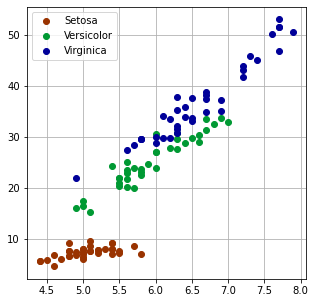

In [11]:
#-------------------------------------------------------------
# TO-DO: Incluye aquí el código necesario para definir la
# lista de atributos relevantes y seleccionar las columnas
# segun el ejercion 7, las caracteristicas mas relevantes son la 0 y la 5
x_train = x_train[:,[0,5]]
x_test = x_test[:,[0,5]]
#-------------------------------------------------------------

plt.figure(figsize=(5, 5))
plt.plot(x_train[t_train.ravel()==0, 0], x_train[t_train.ravel()==0, 1], 'o', label='Setosa', color='#993300')
plt.plot(x_train[t_train.ravel()==1, 0], x_train[t_train.ravel()==1, 1], 'o', label='Versicolor', color='#009933')
plt.plot(x_train[t_train.ravel()==2, 0], x_train[t_train.ravel()==2, 1], 'o', label='Virginica', color='#000099')
plt.grid(True)
plt.legend(loc=2)
plt.show()

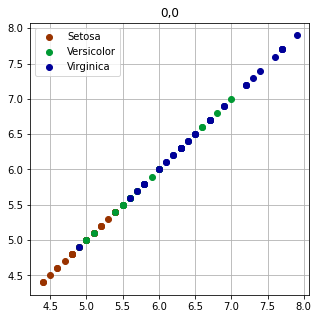

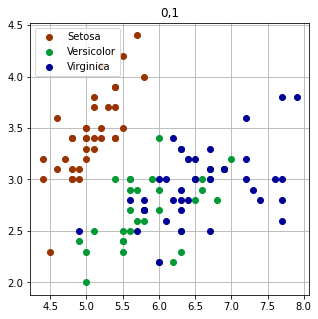

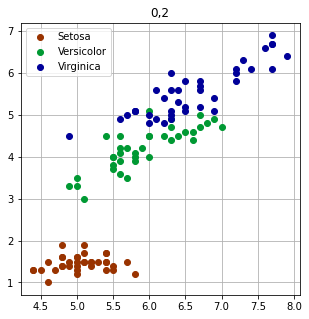

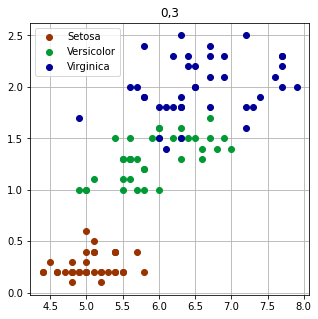

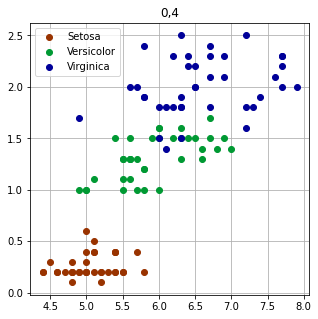

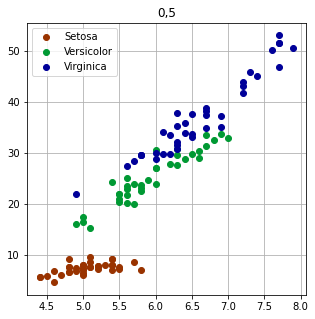

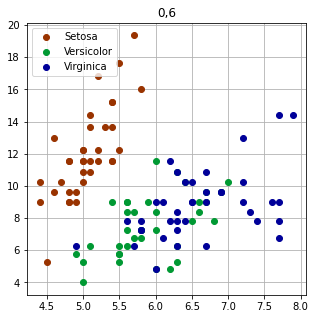

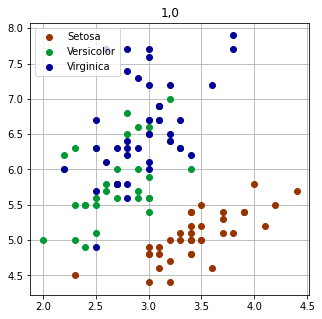

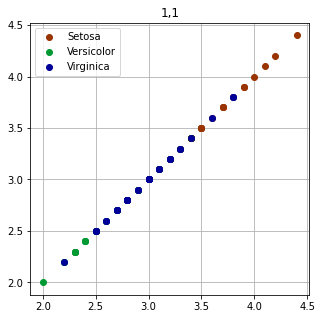

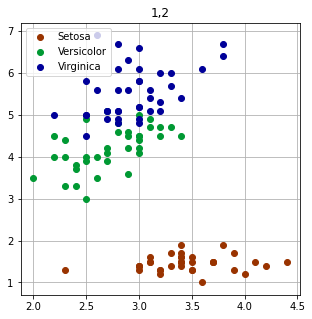

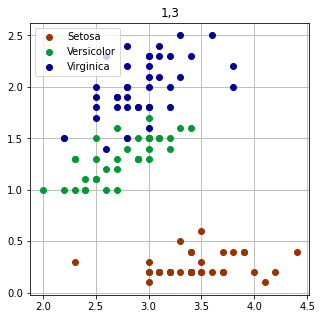

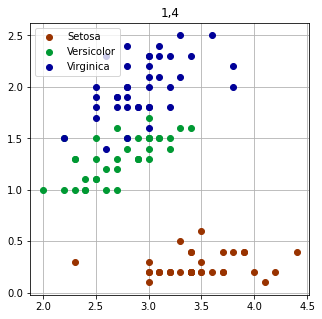

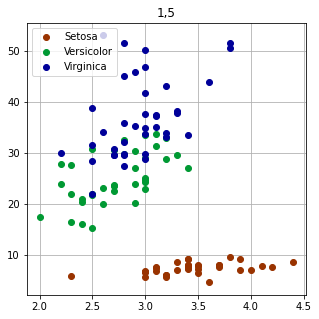

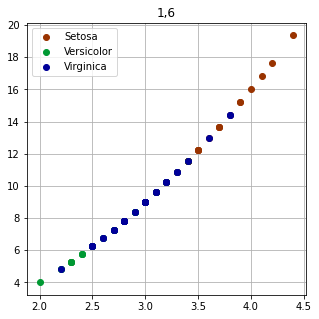

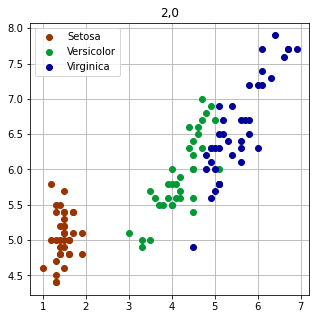

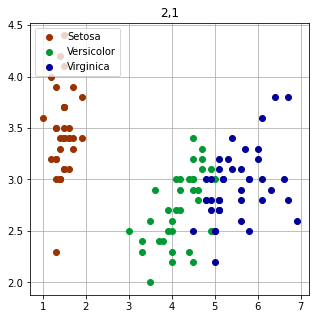

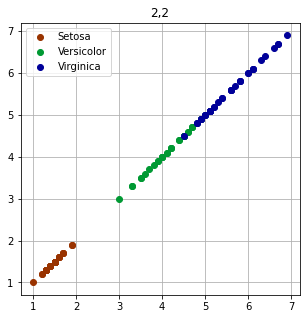

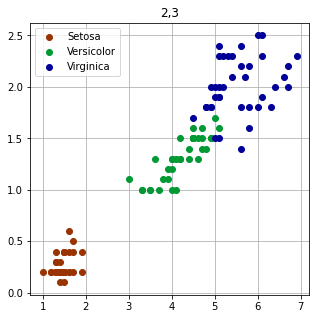

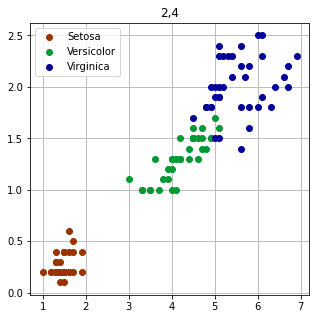

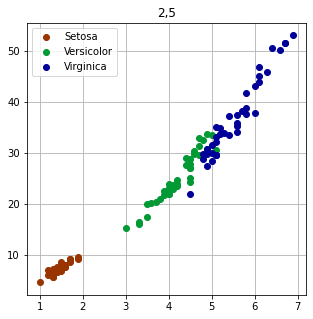

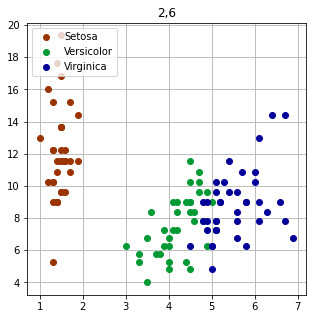

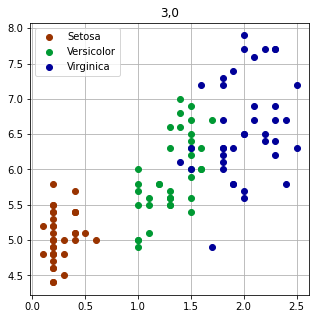

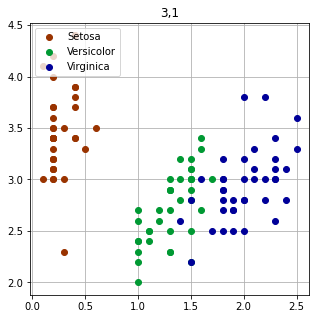

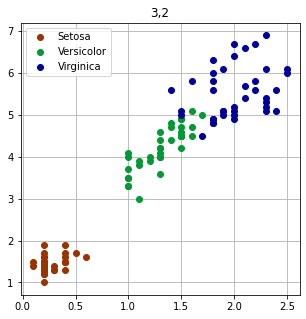

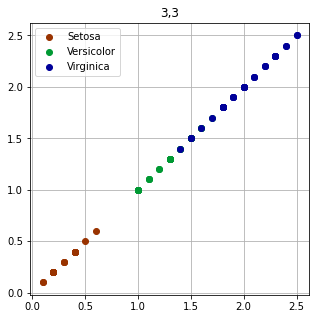

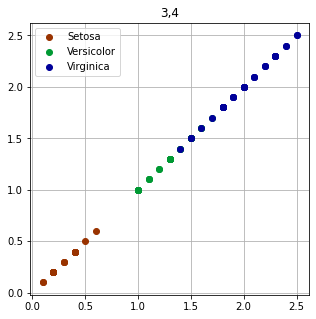

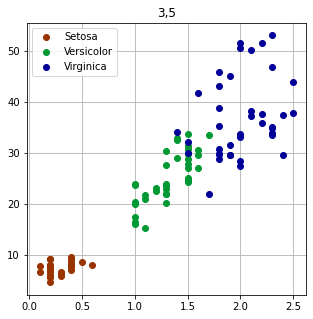

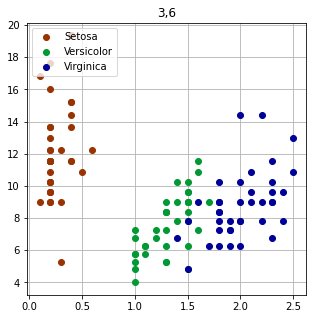

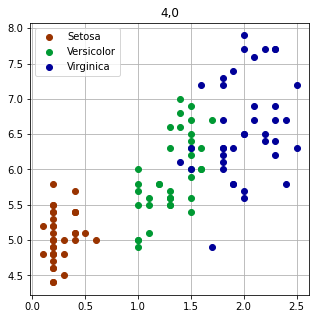

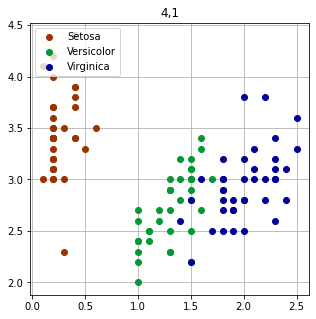

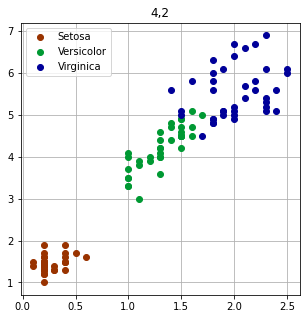

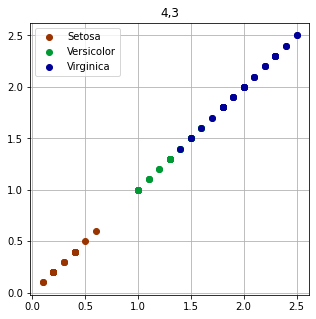

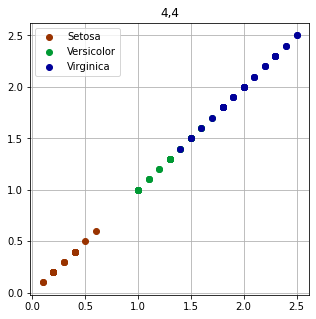

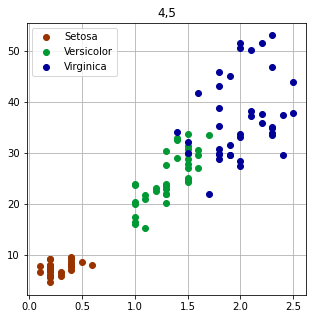

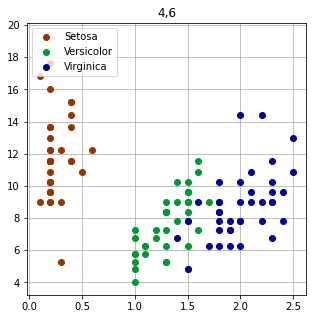

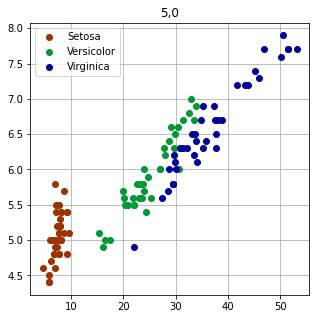

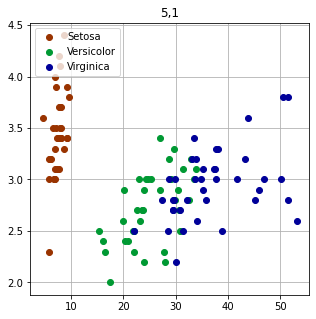

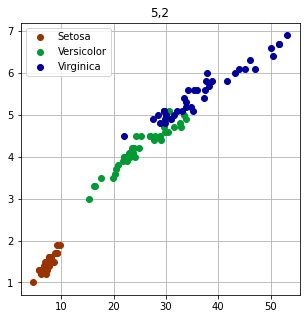

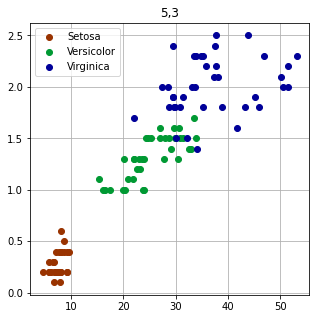

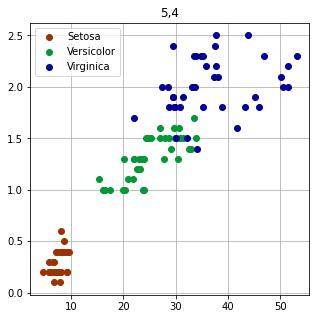

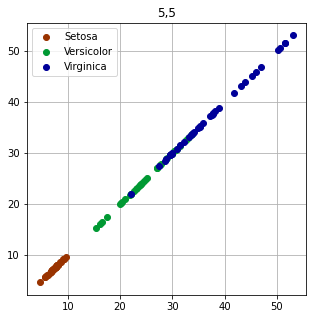

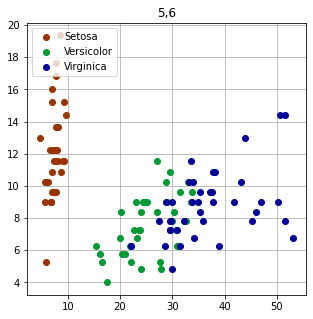

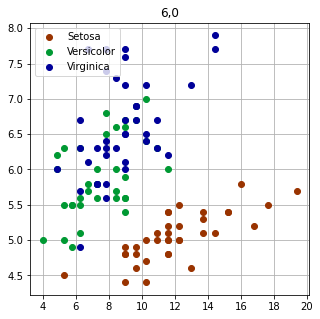

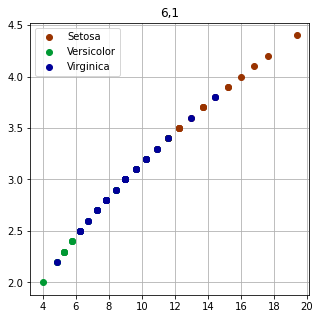

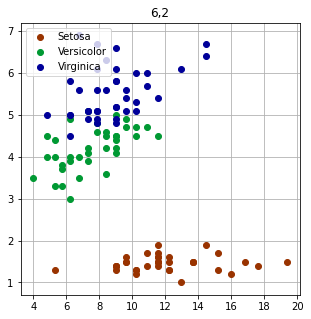

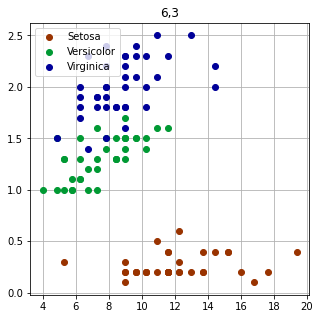

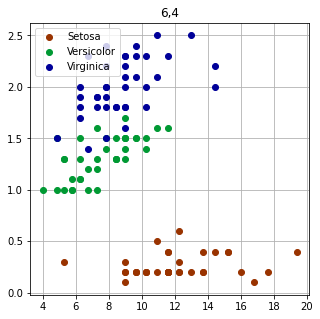

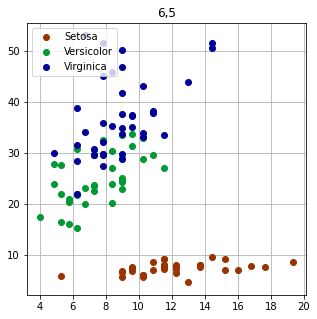

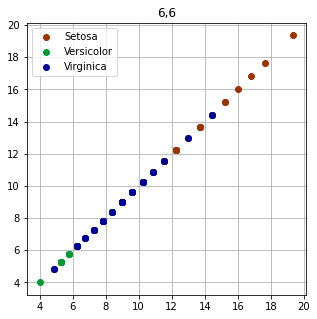

In [4]:
# para confimarlo, ploteo todas las posibles combinaciones
# al compara todas las opciones abajo; parece que las caracteristicas 0,5 es de las que mejor separacion entre flores da.
# Co probar que las caracteristicas a elegir son las 0,5
for i in range (0,7):
    for j in range (0,7):
        x_train, x_test, t_train, t_test = load_data_iris()
        x_train = x_train[:,[i,j]]
        x_test = x_test[:,[i,j]]
        plt.figure(figsize=(5, 5))
        plt.title(f'{i},{j}')
        plt.plot(x_train[t_train.ravel()==0, 0], x_train[t_train.ravel()==0, 1], 'o', label='Setosa', color='#993300')
        plt.plot(x_train[t_train.ravel()==1, 0], x_train[t_train.ravel()==1, 1], 'o', label='Versicolor', color='#009933')
        plt.plot(x_train[t_train.ravel()==2, 0], x_train[t_train.ravel()==2, 1], 'o', label='Virginica', color='#000099')
        plt.grid(True)
        plt.legend(loc=2)
        plt.show()

In [12]:
# HE PROBADO CON 5 Y 6 O LA RED Y NO ME APRENDE BIEN.
# AL VER LOS HISTOGRAMAS Y LAS GRAFICAS DE ARRIBA SE VE QUE LA 1 Y 6 
# NO APROTAN NADA PARA SEPARAR NI LA SETOSA COMPARADA CON LAS
# MENAS CARACTERITCAS. ESO EXPLICARIA PORQUE TIENEN PESOS TAN BAJOS
# CUANDO REGULARIZO POR L1 Y L2.

# ENTONCES ME QUEDO CON CARACTERTICA 5. 
# Y DE LAS CARACTERITICAS 0,2,3,4; LA QUE TIENE UNA CORRELACION MENOr
# CON RESPECTO A LAS DEMAS ES LA 0; QUE SE VE EN LA MATRIZ DE CORRELACION Y EN LOS
# PESOS DIFERENTES EN CUANDO REGULARIZO L1 Y L2.

# CON LO QUE ME QUEDO CON 0 Y 5 COMO CARACTERITICAS A ELEGIR DE ESTE EJERCICIO 8.

<font color="#CA3532">[8.2]</font> [0.5 puntos] Crea de nuevo un modelo que resuelva el problema del Iris dataset modificado con el dataset generado previamente (solamente los 2 mejores atributos). En este caso, no es necesario introducir regularización L1 porque ya hemos simplificado el problema.

Requisitos para puntuar el ejercicio:

1. El modelo no debe tener más de 25 parámetros.

2. Se debe alcanzar más de un 90% de accuracy en test.

In [14]:
# ME HE CREADO ESTA CELDA PARA NO IR TODO EL RATO AL PRINCIPIO
# CADA VEZ QUE INCIALIZO EL KERNEL EN ESTE EJERCICIO
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('MIAX9')
import dlfbt

# Incluye aquí otros imports que necesites
from time import time
import shutil
!pip install -q -U keras-tuner
import keras_tuner as kt
import seaborn as sns
import pickle

In [24]:
# inicializo de nuevo los valores x_train, x_test, t_train, t_test para no tener problemas
def load_data_iris():
  x_train = np.load("MIAX9/iris_dataset/data_train.npy")
  x_test = np.load("MIAX9/iris_dataset/data_test.npy")
  t_train = np.load("MIAX9/iris_dataset/target_train.npy")
  t_test = np.load("MIAX9/iris_dataset/target_test.npy")
  return x_train, x_test, t_train, t_test
x_train, x_test, t_train, t_test = load_data_iris()
x_train = x_train[:,[0,5]]
x_test = x_test[:,[0,5]]
from tensorflow.keras.utils import to_categorical
t_train = to_categorical(t_train)
t_test = to_categorical(t_test)


model = keras.Sequential()

#-------------------------------------------------------------
# TO-DO: Incluye aquí las capas necesarias
#  utiliza el mismo factor de regularización para W y b
model.add(keras.layers.Input(shape=(2,))) # numero de caracteristicas
model.add(keras.layers.Dense(2, activation='tanh'))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(3,activation="softmax")) # numero de posibles salidas al hacer to_categorical
#-------------------------------------------------------------

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 2)                 6         
                                                                 
 dense_22 (Dense)            (None, 2)                 6         
                                                                 
 dense_23 (Dense)            (None, 3)                 9         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


Compila el modelo, utilizando un optimizador Adam y la función de coste más apropiada para este problema. Tenéis libertad para utilizar cualquier función de coste (https://keras.io/api/losses/). El learning rate lo deberás ajustar para que el entrenamiento converja:

In [25]:
#-------------------------------------------------------------
# TO-DO: Compila el modelo
learning_rate = 0.01
loss = 'categorical_crossentropy'
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss=loss,
              metrics=['acc'])
#-------------------------------------------------------------

La siguiente celda ajusta tu modelo a los datos y muestra gráficamente el resultado:

Epoch 1/200
4/4 [==============================] - 3s 172ms/step - loss: 1.1468 - acc: 0.3214 - val_loss: 1.0845 - val_acc: 0.3684
Epoch 2/200
4/4 [==============================] - 0s 25ms/step - loss: 1.1088 - acc: 0.4286 - val_loss: 1.0613 - val_acc: 0.3684
Epoch 3/200
4/4 [==============================] - 0s 25ms/step - loss: 1.0834 - acc: 0.4464 - val_loss: 1.0521 - val_acc: 0.5263
Epoch 4/200
4/4 [==============================] - 0s 26ms/step - loss: 1.0632 - acc: 0.5089 - val_loss: 1.0436 - val_acc: 0.5526
Epoch 5/200
4/4 [==============================] - 0s 30ms/step - loss: 1.0446 - acc: 0.4554 - val_loss: 1.0107 - val_acc: 0.4737
Epoch 6/200
4/4 [==============================] - 0s 27ms/step - loss: 1.0136 - acc: 0.4196 - val_loss: 0.9717 - val_acc: 0.4737
Epoch 7/200
4/4 [==============================] - 0s 30ms/step - loss: 0.9781 - acc: 0.4643 - val_loss: 0.9288 - val_acc: 0.6053
Epoch 8/200
4/4 [==============================] - 0s 29ms/step - loss: 0.9287 - acc: 0.5

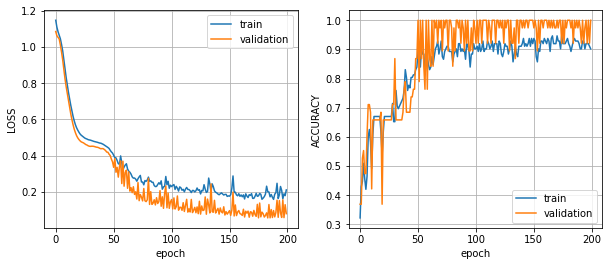

In [26]:
history = model.fit(x_train, t_train, epochs=200, verbose=1, validation_data=(x_test, t_test))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="validation")
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('LOSS')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label="train")
plt.plot(history.history['val_acc'], label="validation")
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

In [27]:
assert model.count_params() < 25, "[FAIL] El número de parámetros es mayor que 25"
assert np.around(model.evaluate(x_test, t_test, verbose=0)[-1], decimals=4) >= 0.9, "[FAIL] El modelo no obtiene un accuracy en validación mayor a 0.9"
assert model.layers[0].activation == keras.activations.tanh, "[FAIL] La primera capa no tiene función de activación tanh"
print("[OK] Requisitos cumplidos")

[OK] Requisitos cumplidos


<font color="#CA3532">[8.3]</font> [0.3 puntos] Indica en la celda siguiente las conclusiones que has extraído de los modelos de los ejercicios 7 y 8. Al menos, comenta los siguientes puntos:

* Comparación del efecto de la regularización (L1 vs L2) en la capa de entrada
* La selección de los atributos de entrada
* La reducción de parámetros del modelo final

In [14]:

# 1. AL ANALIZAR LOS DATOS:
# COMO SE VE EN LA MATRIZ DE CORRELACIÓN QUE SE PRESENTÓ EN EL EJERCICIO ANTERIOR NO SE VEN ESTÁN 
# CONCLUSIONES; YA QUE ESTAN LOS PESOS DISTRIBUIDOS DE UNA FORMA MAS O MENOS UNIFORME POR TODAS LAS 
# NEURONAS DE LA CAPA DE ENTRADA. POR ESO SE DEBERIA REGULARIZAR CON l2; COMO SE PIDE MAS TARDE.
# COMO SE DIJO EN CLASE L1 PUEDE IDENTIFICAR LOS ATRIBUTOS REDUNDANES, POR EJEMPLO PARA ANULARLOS.
# EN CASO DE QUERER SIMPLIFICAR EL MODELO DEBEMOS USAR L2

# ADEMAS EN LA PARTE DE HISTOGRAMAS DE COLOR POR ATRIBUTO QUE EL COLOR ES POR C=0,1 O 2; SE VE:
# A) ABRIBUTOS 3,4,5 Y 6 QUE SON LAS CARACTERISTICAS 2,3,4,5; SEPARAN MUY BIEN
# EN TRAIN COMO EN TEST EL C = 0 CON RESPECTO AL C = 1 Y C = 2.
# B) ATRIBUTO 2 Y 7; QUE SON LAS CARACTERISTICAS 1 Y 6; SON CASI IDENTICAS EN TRAIN Y TEST.
# SE VE MUY BIEN EN LA GRAFICA DE TEST.

# LO QUE VEO EN LA MATRIZ DE COVARIANCA/ CORRELACION ES:
# A) LA CARACTERÍSTICA 1 TIENE UNA CORRELACIÓN TOTAL CON LA CARACTERÍSTICA 6. SI SALVAMOS LA 6,
# PODEMOS QUITAR LA 1; O VICEVERSA
# B) LA CARACTERÍSTICA 5 TIENE UNA CORRELACIÓN ALTÍSIMA CON LAS CAPAS 0,2(CON ESTA CAPA LA CORRELACIÓN 
# ES CASI TOTAL),3 Y 4. POR LO TANTO PODEMOS QUITAR LA 5 Y SALVAR LA 0,2,3 Y 4; o quedarnos con la 5
# C) LA CARACTERÍSTICA 2 TIENE UNA CORRELACIÓN ALTÍSIMA CON LAS CAPAS 3,4,5; POR ESO ESPERO CUANDO 
# REGULARICE CON L2 QUE LE DE POCO PESO.

# 2. AL APLICAR l2reg = 0.3:
# En el caso en que queramos "simplificar" el modelo usamos L2
# 1) QUE LA NEURONA 1 LA PUEDO QUITAR YA QUE LE DA MUY POCOS PESOS
# 1) QUE COMO LAS CARACTERISTICAS 6  Y 1 ERAN CASI IDENTICAS, PUES LE PONE MAS PESOS EN LA 6 
# Y HACE QUE LA 1 NO CUENTE NADA
# 2) COMO LA CARACTERISTICA 5 ES LA QUE ENGLOVA MAS RELACION CON OTRAS CARACTERISTICAS (0,2,3,4), 
# LE DA MUCHO MAS PESO Y LA 0,2,3,4, LAS PONEN PESO MAS SEMEJANTES
# 3) COMO LA 2 TIENE MUCHAS CORRELACION CON 3 Y 4; LE PONE PESOS PARECIDOS. ESPERO QUE SE VEA CON EL L1

# 3. AL APLICAR l1reg = 0.1:
# SE VE QUE LA 3 Y 4 TIENEN MUCHA CORRELACION 
# EN CASE SE DIJO: "
# En el caso en que queramos "apagar" neuronas usamos L1
# L1 puede identificar los atributos de entrada redundantes, por ejemplo, para anularlos
# l2 SIRVE PARA "APAGAR NEURONAS". 
#"
# COMO DIJE AL PRINCIPO DE ESTE EJERCICIO, LAS CARACTERISTICAS 1 Y 2 
# TIENEN MUCHA CORRELACION CON OTRAS CARACTERITITICAS Y POR ES LAS PONE PESOS TAN BAJOS
# A) LA CARACTERISTICA 1 TIENE UNA CORRELACION TOTAL CON LA CARACTERISTICA 6. 
# POR ESO LA PONE TAN POCO PESO A LA NEURONA DE LA CAPA DE ENTRADA 1.
# B) LA CARACTERISTICA 2 TIENE UNA CORRELACION ALTISIMA CON LAS CAPAS 3,4,5. 
# POR ESO LA PONE TAN POCO PESO A LA NEURONA DE LA CAPA DE ENTRADA 2.

# 3 Y 4 SE MANTIENEN IGUALES. SE PARECIAN MUCHO. mE PODRIA QUEDAR CON UNA DE ELLAS.
# LE DA MUY POCO PESO A 0,1,2,5 Y 6. cOMO LA CARACTERITICA 5 SALIA MUY ALTA CON L2, 
# ENTONCES SE ENTIENDO QUE DEBERIA ELIMINAR PARA EL EJERCICIO 8 ( EN EL QUE ME HE DE 
# QUEDAR CON 2 CARACTERITICAS):
# A) CARACTERISTICA 0 NO LA USO POR VALOR BAJO CUANDO APLICO L1 Y L2. Y EN MATRIZ DE COVARIANZA 
# TIENE MUCHA RELACION CON CARACTERISTICA 5.
# B) CARACTERISTICA 1 NO LA USO POR VALOR BAJO CUANDO APLICO L1 Y L2. Y EN MATRIZ DE COVARIANZA 
# TIENE MUCHA RELACION CON CARACTERISTICA 5.
# C) CARACTERISTICA 2 NO LA USO POR VALOR BAJO CUANDO APLICO L1 Y L2. Y EN MATRIZ DE COVARIANZA 
# TIENE MUCHA RELACION CON CARACTERISTICA 3,4 Y 5.
# D) CARACTERISTICA 3 , EN MATRIZ DE COVARIANZA TIENE MUCHA RELACION CON CARACTERISTICA 3,4 Y 5.
# PODRIA USARLA PARA EL SIGUIENTE EJERCIO SI NO USO LA 4. 
# E) CARACTERISTICA 4 , EN MATRIZ DE COVARIANZA TIENE MUCHA RELACION CON CARACTERISTICA 3,4 Y 5.
# PODRIA USARLA PARA EL SIGUIENTE EJERCIO SI NO USO LA 3. 
# F) CARACTERISTICA 5 , l ME DICE QUE LA USE Y EN MATRIZ DE COVARIANZA TIENE MUCHA RELACION C
# CON CARACTERISTICA 0,2,3,4 Y 5. PERO ENTONCES HE DE ELEGIR ENTRE CARACTERITICA 3,4 O 5.
# G) CARACTERISTICA 6 , TIENE PESOS EN CUANDO APLICO L1 Y L2 MUY PARECEIOS A CARACTERITICA 0.
# Y EN LOS HISTOGRAMAS SE VIO QUE SEPARABA MUY BIEN C = 1 CON REPSPECTO C= 2 Y 3

# ENTONCES PROPONGO QUEDARME CON LAS CARACTERITICAS 5 Y 6 PERO VEO TAMBIEN QUE 6 Y 0 
# NO APAROTAN MUCHO A LA RED COMO EXPLICO EN EL SIGUIENTE PUNTO.

# 4. AL VER COMO EL MODELO APRENDE:
# HE PROBADO CON 5 Y 6 O LA RED Y NO ME APRENDE BIEN.
# AL VER LOS HISTOGRAMAS Y LAS GRAFICAS DE ARRIBA SE VE QUE LA 1 Y 6 
# NO APROTAN NADA PARA SEPARAR NI LA SETOSA COMPARADA CON LAS
# MENAS CARACTERITCAS. ESO EXPLICARIA PORQUE TIENEN PESOS TAN BAJOS
# CUANDO REGULARIZO POR L1 Y L2.

# ENTONCES ME QUEDO CON CARACTERTICA 5. 
# Y DE LAS CARACTERITICAS 0,2,3,4; LA QUE TIENE UNA CORRELACION MENOR
# CON RESPECTO A LAS DEMAS ES LA 0; QUE SE VE EN LA MATRIZ DE CORRELACION Y EN LOS
# PESOS DIFERENTES EN CUANDO REGULARIZO L1 Y L2.

# CON LO QUE ME QUEDO CON 0 Y 5 COMO CARACTERITICAS A ELEGIR DE ESTE EJERCICIO 8.
# Y TENGO QUE RENICIALIZAR EL KERNEL PARA QUE ME APRENDA BIEN. DEBE HABER ALGO DE 
# INICIALIZACION DE PESOS YA QUE ALGUNA VEZ NO ME ALCANZA. SON LAS MINIMAS.
# Y EL MEJOR MODELO QUE HE TESTTEADO QUE ME SALE CON MENSO DE 25 PARAMENTOS ES EL USADO.
# HE PROVADO VARIOS.


### <font color="#CA3532">Parte IV: PyTorch</font>

En los últimos ejercicios trabajaremos con PyTorch. Echa un vistazo a este ejemplo: http://seba1511.net/tutorials/beginner/examples_autograd/two_layer_net_autograd.html

In [108]:
import torch
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader

#### <font color="#CA3532">Ejercicio 9</font> [1 punto] 

En primer lugar vamos a construir un modelo de regresión lineal. Completa el código de la clase ``LinearRegressionModel_PyTorch`` rellenando todos los bloques marcados con un ``TO-DO``. Ten en cuenta que no es necesario calcular los gradientes explicitamente, pues pueden ser obtenidos llamando al método ``backward`` sobre la función de coste a optimizar.

In [109]:
class LinearRegressionModel_PyTorch(object):

    def __init__(self, d=2):
        # Initialize weights and bias:
        self.w = Variable(torch.randn(d, 1, dtype=torch.float64), requires_grad=True)
        self.b = Variable(torch.randn(1, 1, dtype=torch.float64), requires_grad=True)
        
    def predict(self, x):
        #-----------------------------------------------------------------------
        # TO-DO block: Compute the model output y
        # Note that:
        # - x is a Nxd torch tensor, with N the number of patterns and d the 
        # dimension (number of features)
        # - y must be a Nx1 torch tensor
        #-----------------------------------------------------------------------
        y = x @ self.w + self.b # entiendo que este tambien vale
        
        # de referencia en los apuntes de clase:
        # print(y)  
        # self.y = y
        # z= x @ self.W + self.b
        # y = tf.sigmoid(z)
        
        # z = tf.matmul(x, w) + b
        # y = tf.sigmoid(z)
        
        # y = torch.matmul(x, self.w) + self.b # entiendo que este tambien vale
        # y = tf.sigmoid(z)
        #-----------------------------------------------------------------------
        # End of TO-DO block 
        #-----------------------------------------------------------------------

        return y

    def gradient_step(self, x, t, eta):
        #-----------------------------------------------------------------------
        # TO-DO block: Compute the loss function, get the gradients and update
        # the model parameters. 
        # Note that:
        # - x is a Nxd torch tensor, with N the number of patterns and d the 
        # dimension (number of features)
        # - t is a Nx1 torch tensor
        # - eta is the learning rate (scalar)
        # It is important to reset the gradients to zero after updating the
        # model parameters.
        #-----------------------------------------------------------------------
        loss = self.get_loss(x, t)
        print(loss)       
        loss.backward()
        print(f'w:{self.w}')
        dw= self.w.grad
        print(f'dw:{dw}')
        print(f'b:{self.b}')
        db= self.b.grad
        print(f'db:{db}')
        self.w.data -= eta * self.w.grad.data
        self.b.data -= eta * self.b.grad.data 
        self.w.grad.data.zero_()
        self.b.grad.data.zero_()
        
        #-----------------------------------------------------------------------
        # End of TO-DO block 
        #-----------------------------------------------------------------------

        return loss.detach().numpy()

    def fit(self, x, t, eta, num_iters):
        loss = np.zeros(num_iters)
        for i in range(num_iters):
            loss[i] = self.gradient_step(x, t, eta)
        return loss

    def get_loss(self, x, t):
        y = self.predict(x)
        loss = torch.mean(0.5*(y - t)*(y - t))
        return loss

Puedes ejecutar las siguientes pruebas para comprobar tu implementación.

Test para el método ``predict``:

In [110]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(noise=0.0, n=500)

linrm = LinearRegressionModel_PyTorch()
linrm.w = Variable(torch.tensor(dg.a, dtype=torch.float64), requires_grad=True)
linrm.b = Variable(torch.tensor(dg.b, dtype=torch.float64), requires_grad=True)

y = linrm.predict(torch.tensor(dg.x, dtype=torch.float64))
print(y.shape)                                                                 # torch.Size([500, 1])
print(np.abs(y.detach().numpy() - dg.t).max())                                 # Should be 0 or close to 0 
print(linrm.get_loss(torch.tensor(dg.x, dtype=torch.float64), torch.tensor(dg.t, dtype=torch.float64)).detach().numpy()) # Should be 0 or close to 0 

torch.Size([500, 1])
1.4210854715202004e-14
5.237494068795179e-30


Test para el método ``gradient_step``:

In [111]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(n=50000, seed=17)

linrm = LinearRegressionModel_PyTorch()
linrm.w = Variable(torch.tensor(dg.a, dtype=torch.float64), requires_grad=True)
linrm.b = Variable(torch.tensor(dg.b, dtype=torch.float64), requires_grad=True)

loss = linrm.gradient_step(torch.tensor(dg.x, dtype=torch.float64), torch.tensor(dg.t, dtype=torch.float64), 0.01)
print(loss)                     # Should be 1.9809999839109536 approx
print(linrm.b.detach().numpy()) # Should be [[1.00007043]] approx
print(linrm.w.detach().numpy()) # Should be [[-4.99946464]
                                #            [ 2.00032769]
                                #            [-2.99996627]
                                #            [ 2.00032938]] approx

tensor(1.9810, dtype=torch.float64, grad_fn=<MeanBackward0>)
w:tensor([[-5.],
        [ 2.],
        [-3.],
        [ 2.]], dtype=torch.float64, requires_grad=True)
dw:tensor([[-0.0535],
        [-0.0328],
        [-0.0034],
        [-0.0329]], dtype=torch.float64)
b:tensor([[1.]], dtype=torch.float64, requires_grad=True)
db:tensor([[-0.0070]], dtype=torch.float64)
1.980999983910953
[[1.00007043]]
[[-4.99946464]
 [ 2.00032769]
 [-2.99996627]
 [ 2.00032938]]


Test para el método ``fit``:

In [112]:
dg = dlfbt.DataGeneratorLinear(a=[2.0, 2.0])
dg.create_dataset(n=500, seed=17)

linrm = LinearRegressionModel_PyTorch(2)
linrm.w = Variable(torch.tensor([[-2.0], [-2.0]], dtype=torch.float64), requires_grad=True)
linrm.b = Variable(torch.tensor([[-3.0]], dtype=torch.float64), requires_grad=True)

loss = linrm.fit(torch.tensor(dg.x), torch.tensor(dg.t), 0.01, 100)
print(loss[-1]) # Should be 2.6618466819937585 approx

tensor(1106.0208, dtype=torch.float64, grad_fn=<MeanBackward0>)
w:tensor([[-2.],
        [-2.]], dtype=torch.float64, requires_grad=True)
dw:tensor([[-252.4847],
        [-254.8563]], dtype=torch.float64)
b:tensor([[-3.]], dtype=torch.float64, requires_grad=True)
db:tensor([[-44.2516]], dtype=torch.float64)
tensor(186.3247, dtype=torch.float64, grad_fn=<MeanBackward0>)
w:tensor([[0.5248],
        [0.5486]], dtype=torch.float64, requires_grad=True)
dw:tensor([[-103.1988],
        [-103.6411]], dtype=torch.float64)
b:tensor([[-2.5575]], dtype=torch.float64, requires_grad=True)
db:tensor([[-18.3290]], dtype=torch.float64)
tensor(33.3853, dtype=torch.float64, grad_fn=<MeanBackward0>)
w:tensor([[1.5568],
        [1.5850]], dtype=torch.float64, requires_grad=True)
dw:tensor([[-42.3009],
        [-41.9993]], dtype=torch.float64)
b:tensor([[-2.3742]], dtype=torch.float64, requires_grad=True)
db:tensor([[-7.7578]], dtype=torch.float64)
tensor(7.9486, dtype=torch.float64, grad_fn=<MeanBackward0>

Gráfica de loss frente a número de iteraciones:

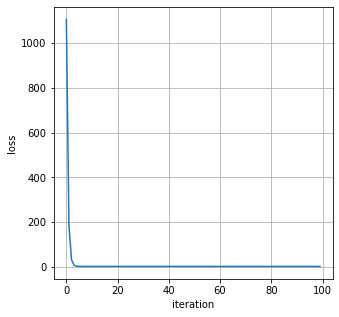

In [113]:
plt.figure(figsize=(5, 5))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid(True)
plt.show()

Gráfica de predicciones frente a objetivos (debería estar distribuída a lo largo de la recta $y=x$):

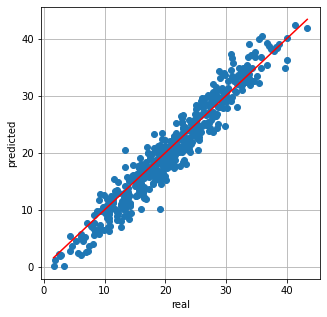

In [114]:
y = linrm.predict(torch.tensor(dg.x)).detach().numpy()
plt.figure(figsize=(5, 5))
plt.plot(dg.t, y, 'o')
plt.plot([dg.t.min(), dg.t.max()], [dg.t.min(), dg.t.max()], 'r-')
plt.xlabel('real')
plt.ylabel('predicted')
plt.grid(True)
plt.show()

#### <font color="#CA3532">Ejercicio 10</font> [1 punto] 

A continuación vamos a construir una red neuronal completa. Igual que antes, debes completar el código de la clase ``NeuralNetwork_Pytorch`` rellenando todos los bloques marcados con un ``TO-DO``. 


In [115]:
class NeuralNetwork_PyTorch(object):
    #---------------------------------------------------------------------------
    # MSE loss:
    #---------------------------------------------------------------------------
    def mse_loss(y, t):
        loss = torch.mean(0.5*(y - t)*(y - t))
        return loss

    #---------------------------------------------------------------------------
    # Cross-entropy loss:
    #---------------------------------------------------------------------------
    def cross_entropy_loss(y, t):
        loss = -torch.mean(t*torch.log(y) + (1.-t)*torch.log(1.-y))
        return loss
     
    #---------------------------------------------------------------------------
    # The constructor receives a list of tuples of the form (n, a), one tuple 
    # for each layer, where n is the number of units in the layer and a is the 
    # activation of the layer. You may use any torch activation. In 
    # particular:
    #
    # - torch.sigmoid: sigmoid activation function 
    # - torch.nn.functional.relu: relu activation function
    # - lambda x: x: identity activation function (to implement a linear layer) 
    # 
    # The activation function is ignored for the input layer.
    # 
    # The minimum is two layers (input and output).
    # The default value is layers=[(2, None), (1, torch.sigmoid)].
    # The output layer must have one single neuron.
    #---------------------------------------------------------------------------
    def __init__(self, layers=[(2, None), (1, torch.sigmoid)]):
        # Network weights and activations:
        self.W = [Variable(torch.randn(n1[0], n2[0], dtype=torch.float64), requires_grad=True) for n1, n2 in zip(layers[:-1], layers[1:])]
        self.b = [Variable(torch.randn(1, n2[0], dtype=torch.float64), requires_grad=True) for n2 in layers[1:]]
        self.a = [n2[1] for n2 in layers[1:]]
            
    #---------------------------------------------------------------------------
    # Implementation of the forward pass, compute the network output y given the
    # input x.
    #
    # Input: x is a torch tensor of dimension Nxd, with N the number of patterns 
    #        and d the dimension (number of features).
    # 
    # Return: the activation y in the last layer, which must be a torch tensor 
    #         of dimension Nx1.
    #---------------------------------------------------------------------------
    def predict(self, x):
        #-----------------------------------------------------------------------
        # TO-DO block: loop in the network layers computing the activations. 
        # The activation of the last layer should be stored at variable y to
        # be returned.
        #-----------------------------------------------------------------------
        #y = x @ self.W + self.b
        
        
        a = x
        for w, b in zip(self.W[:-1], self.b[:-1]):
            z = a @ w + b
            a = torch.sigmoid(z)
            # Va bien aunque en el programa se usa torch.sigmoid
        y = a @ self.W[-1] + self.b[-1]
        #-----------------------------------------------------------------------
        # End of TO-DO block 
        #-----------------------------------------------------------------------
                  
        return y
            
    #---------------------------------------------------------------------------
    # Gradient step: computes the loss function between the network's output
    # for input x and the target t, gets the gradients of the loss function 
    # with respect to the model's parameters and updates the parameters. 
    #
    # Input: x is a torch tensor of dimension Nxd, with N the number of patterns 
    #        and d the dimension (number of features).
    #        t is a torch tensor of dimension Nx1.
    #        eta is the learning rate (a scalar).
    #        loss_function is the loss function, either mse_loss or
    #        cross_entropy_loss
    #
    # Return: the loss, as a numpy scalar, before updating the parameters.
    #---------------------------------------------------------------------------
    def gradient_step(self, x, t, eta, loss_function):
        #-----------------------------------------------------------------------
        # TO-DO block: Loop in layers updating the model parameters b and w
        #-----------------------------------------------------------------------
        
        loss = self.get_loss(x, t, loss_function)
        # print(f'loss:{loss}')       
        loss.backward()        
        
        for i in range(0, len(self.W)):
            # print(f'self.W[{i}]:{self.W[i]}')
            # print(f'self.W[{i}].data:{self.W[i].data}')
            # print(f'dW_{i}:{self.W[i].grad}')
            self.W[i].data -= eta * self.W[i].grad.data
            self.W[i].grad.data.zero_()

        for i in range(0, len(self.b)):
            # print(f'self.b[{i}]:{self.b[i]}')
            # print(f'self.b[{i}].data:{self.b[i].data}')
            # print(f'db_{i}:{self.b[i].grad}')
            self.b[i].data -= eta * self.b[i].grad.data
            self.b[i].grad.data.zero_()
        #-----------------------------------------------------------------------
        # End of TO-DO block 
        #-----------------------------------------------------------------------

        return loss.detach().numpy()

    #---------------------------------------------------------------------------
    # Fit the model parameters to the training data x, t.
    # Return the loss at each training epoch.
    #---------------------------------------------------------------------------
    def fit(self, x, t, eta, num_epochs, batch_size, loss_function, verbose=False):
        train_dataset = TensorDataset(x, t) 
        train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) 

        loss = np.zeros(num_epochs)
        for i in range(num_epochs):
            for xbatch, tbatch in train_dataloader:   
                self.gradient_step(xbatch, tbatch, eta, loss_function)

            # Calculo el loss de la epoca con todos los datos:
            loss[i] = self.get_loss(x, t, loss_function).detach().numpy()
            # Print:
            if verbose:
                print("Epoch %d -- loss %f" % (i, loss[i]))
        return loss

    #---------------------------------------------------------------------------
    # Compute loss:
    #---------------------------------------------------------------------------
    def get_loss(self, x, t, loss_function):
        y = self.predict(x)
        return loss_function(y, t)

Puedes ejecutar las siguientes pruebas para chequear tu implementación.

Método ``predict``:

In [116]:
np.random.seed(17)
torch.manual_seed(17)
x = np.random.randn(20, 3)

net = NeuralNetwork_PyTorch([(3, None), (10, torch.nn.functional.relu), (1, torch.sigmoid)])
y = net.predict(torch.tensor(x, dtype=torch.float64))

# Tensor shape, should be torch.Size([20, 1])
print(y.shape)

# Array values, should match those on the test file, so that all prints are 0 
# or close to 0:
with open('MIAX9/test_nn_pytorch_predict.pickle', 'rb') as handle:
    yexp = pickle.load(handle)
print(np.max(np.abs(y.detach().numpy() - yexp)))

torch.Size([20, 1])
1.31273874906142


Método ``gradient_step``:

In [117]:
np.random.seed(17)
torch.manual_seed(17)
x = np.random.randn(20, 3)
t = np.random.randn(20, 1)

net = NeuralNetwork_PyTorch([(3, None), (10, torch.nn.functional.relu), (1, torch.sigmoid)])

loss = net.gradient_step(torch.tensor(x, dtype=torch.float64), torch.tensor(t, dtype=torch.float64), 0.01, NeuralNetwork_PyTorch.mse_loss)

# Array shapes, should be:
# torch.Size([3, 10])
# torch.Size([1, 10])
# torch.Size([10, 1])
# torch.Size([1, 1])
for dwp, dbp in zip(net.W, net.b):
    print(dwp.shape)
    print(dbp.shape)

# Array values, should match those on the test file, so that all prints are 0 
# or close to 0:
with open('MIAX9/test_nn_pytorch_gradient_step.pickle', 'rb') as handle:
    [dWexp, dbexp] = pickle.load(handle)

for dwp, dbp, dwe, dbe in zip(net.W, net.b, dWexp, dbexp):
    print(np.max(np.abs(dwp.detach().numpy() - dwe)))
    print(np.max(np.abs(dbp.detach().numpy() - dbe)))

torch.Size([3, 10])
torch.Size([1, 10])
torch.Size([10, 1])
torch.Size([1, 1])
0.001528219739808101
0.0006655443636168767
0.003431081949939019
0.00369418372684982


Método ``fit`` (problema de regresión):

In [118]:
dg = dlfbt.DataGeneratorLinear(a=[2.0, 2.0])
dg.create_dataset(n=1000, seed=17, noise=1.0)

np.random.seed(23)
torch.manual_seed(23)
net = NeuralNetwork_PyTorch([(2, None), (1, lambda x: x)])
loss = net.fit(torch.tensor(dg.x, dtype=torch.float64), torch.tensor(dg.t, dtype=torch.float64), 0.01, 100, 100, NeuralNetwork_PyTorch.mse_loss)
y = net.predict(torch.tensor(dg.x, dtype=torch.float64))

# Array shape, should be torch.Size([1000, 1]):
print(y.shape)

# Array values, should match those on the test file, so that all prints are 0 
# or close to 0:
with open('MIAX9/test_nn_pytorch_fit.pickle', 'rb') as handle:
    yexp = pickle.load(handle)
print(np.max(np.abs(y.detach().numpy() - yexp)))

torch.Size([1000, 1])
0.0


Gráfica de loss frente a número de iteraciones:

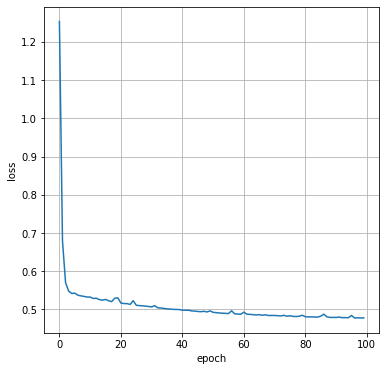

In [119]:
plt.figure(figsize=(6, 6))
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

Gráfica de predicciones frente a objetivos (debería estar distribuída a lo largo de la recta $y=x$):

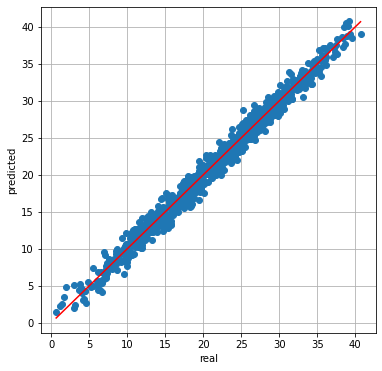

In [120]:
y = net.predict(torch.tensor(dg.x, dtype=torch.float64)).detach().numpy()
plt.figure(figsize=(6, 6))
plt.plot(dg.t, y, 'o')
plt.plot([dg.t.min(), dg.t.max()], [dg.t.min(), dg.t.max()], 'r-')
plt.xlabel('real')
plt.ylabel('predicted')
plt.grid(True)
plt.show()